In [1]:
import numpy as np
from datascience import *
import pandas as pd
from scipy import stats

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Load and Clean Datasets

For this analysis, two datasets will be used. The first is the Location Affordability Index, which contains hundreds of features regarding homeownership and home availability across the United States. The second is the Minnesota Homeownership Rate dataset, which contains the average yearly homeownership rate for Minnesota year-over-year.

## Location Affordability Index

To start off the analysis, first import the Location Affordability Index dataset from the csv file. From there, the labels of the dataset will be reviewed, as well as the size of the dataset.

In [2]:
#Import location affordability index (lai) dataset
lai = Table().read_table("Location_Affordability_Index_v3.csv")

C:\Users\Owner\AppData\Roaming\Python\Python311\site-packages\datascience\tables.py:163: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pandas.read_csv(filepath_or_buffer, *args, **vargs)


In [3]:
#Review all columns and data types
for label in lai.labels:
    print(label, type(lai.column(label)[0]))

OBJECTID <class 'numpy.int32'>
GEOID <class 'numpy.int64'>
STATE <class 'numpy.int32'>
COUNTY <class 'numpy.int32'>
TRACT <class 'numpy.int32'>
CNTY_FIPS <class 'numpy.float64'>
STUSAB <class 'numpy.str_'>
households <class 'numpy.float64'>
owner_occupied_hu <class 'numpy.float64'>
renter_occupied_hu <class 'numpy.float64'>
pct_renters <class 'numpy.float64'>
pct_renter_occupied_hu <class 'numpy.float64'>
pct_transit_j2w_renters <class 'numpy.float64'>
pct_transit_j2w_owners <class 'numpy.float64'>
pct_transit_j2w <class 'numpy.float64'>
median_smoc_mortgage <class 'numpy.float64'>
median_gross_rent <class 'numpy.float64'>
avg_h_cost <class 'numpy.float64'>
autos_per_hh_renters <class 'numpy.float64'>
autos_per_hh_owner <class 'numpy.float64'>
autos_per_hh <class 'numpy.float64'>
commuters_per_hh_renters <class 'numpy.float64'>
commuters_per_hh_owners <class 'numpy.float64'>
commuters_per_hh <class 'numpy.float64'>
avg_hh_size_renters <class 'numpy.float64'>
avg_hh_size_owners <class '

In [4]:
#Identify size of lai dataset
lai_size = (lai.num_columns, lai.num_rows)
print(f"Location Affordability Index size: {lai_size}")

Location Affordability Index size: (444, 73763)


In [5]:
#Show top 10 rows of location affordability index
lai.show(10)

OBJECTID,GEOID,STATE,COUNTY,TRACT,CNTY_FIPS,STUSAB,households,owner_occupied_hu,renter_occupied_hu,pct_renters,pct_renter_occupied_hu,pct_transit_j2w_renters,pct_transit_j2w_owners,pct_transit_j2w,median_smoc_mortgage,median_gross_rent,avg_h_cost,autos_per_hh_renters,autos_per_hh_owner,autos_per_hh,commuters_per_hh_renters,commuters_per_hh_owners,commuters_per_hh,avg_hh_size_renters,avg_hh_size_owners,avg_hh_size,area_income_renter_frac,median_hh_income,median_rooms_per_renter_hu,median_rooms_per_owner_hu,median_rooms_per_hu,pct_hu_1_detached,gross_hh_density,area_income_owner_frac,area_income_frac,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,veh_count,avg_vmt,avg_hh_vmt,std_dev_vmt,area_type,area_stfid,hh1_control_hh_income_frac,hh1_control_hh_income,hh1_control_hh_size,hh1_control_hh_commuters,hh1_fixes,hh1_model_autos_per_hh_owners,hh1_model_h_cost_owners,hh1_model_pct_transit_commuters_owners,hh1_model_vmt_per_hh_owners,hh1_model_autos_per_hh_renters,hh1_model_h_cost_renters,hh1_model_pct_transit_commuters_renters,hh1_model_vmt_per_hh_renters,hh1_model_autos_per_hh,hh1_model_h_cost,hh1_model_pct_transit_commuters,hh1_model_vmt_per_hh,hh1_alpha,hh1_beta,hh1_gas_price,hh1_mpg,hh1_income_bin,hh1_auto_own_cost_owners,hh1_vmt_cost_owners,hh1_transit_cost_owners,hh1_transit_trips_owners,hh1_t_cost_owners,hh1_t_owners,hh1_h_owners,hh1_ht_owners,hh1_auto_own_cost_renters,hh1_vmt_cost_renters,hh1_transit_cost_renters,hh1_transit_trips_renters,hh1_t_cost_renters,hh1_t_renters,hh1_h_renters,hh1_ht_renters,hh1_auto_own_cost,hh1_vmt_cost,hh1_transit_cost,hh1_transit_trips,hh1_t_cost,hh1_t,hh1_h,hh1_ht,hh1_pctile_all,hh1_pctile_own,hh1_pctile_rent,hh2_control_hh_income_frac,hh2_control_hh_income,hh2_control_hh_size,hh2_control_hh_commuters,hh2_fixes,hh2_model_autos_per_hh_owners,hh2_model_h_cost_owners,hh2_model_pct_transit_commuters_owners,hh2_model_vmt_per_hh_owners,hh2_model_autos_per_hh_renters,hh2_model_h_cost_renters,hh2_model_pct_transit_commuters_renters,hh2_model_vmt_per_hh_renters,hh2_model_autos_per_hh,hh2_model_h_cost,hh2_model_pct_transit_commuters,hh2_model_vmt_per_hh,hh2_alpha,hh2_beta,hh2_gas_price,hh2_mpg,hh2_income_bin,hh2_auto_own_cost_owners,hh2_vmt_cost_owners,hh2_transit_cost_owners,hh2_transit_trips_owners,hh2_t_cost_owners,hh2_t_owners,hh2_h_owners,hh2_ht_owners,hh2_auto_own_cost_renters,hh2_vmt_cost_renters,hh2_transit_cost_renters,hh2_transit_trips_renters,hh2_t_cost_renters,hh2_t_renters,hh2_h_renters,hh2_ht_renters,hh2_auto_own_cost,hh2_vmt_cost,hh2_transit_cost,hh2_transit_trips,hh2_t_cost,hh2_t,hh2_h,hh2_ht,hh2_pctile_all,hh2_pctile_own,hh2_pctile_rent,hh3_control_hh_income_frac,hh3_control_hh_income,hh3_control_hh_size,hh3_control_hh_commuters,hh3_fixes,hh3_model_autos_per_hh_owners,hh3_model_h_cost_owners,hh3_model_pct_transit_commuters_owners,hh3_model_vmt_per_hh_owners,hh3_model_autos_per_hh_renters,hh3_model_h_cost_renters,hh3_model_pct_transit_commuters_renters,hh3_model_vmt_per_hh_renters,hh3_model_autos_per_hh,hh3_model_h_cost,hh3_model_pct_transit_commuters,hh3_model_vmt_per_hh,hh3_alpha,hh3_beta,hh3_gas_price,hh3_mpg,hh3_income_bin,hh3_auto_own_cost_owners,hh3_vmt_cost_owners,hh3_transit_cost_owners,hh3_transit_trips_owners,hh3_t_cost_owners,hh3_t_owners,hh3_h_owners,hh3_ht_owners,hh3_auto_own_cost_renters,hh3_vmt_cost_renters,hh3_transit_cost_renters,hh3_transit_trips_renters,hh3_t_cost_renters,hh3_t_renters,hh3_h_renters,hh3_ht_renters,hh3_auto_own_cost,hh3_vmt_cost,hh3_transit_cost,hh3_transit_trips,hh3_t_cost,hh3_t,hh3_h,hh3_ht,hh3_pctile_all,hh3_pctile_own,hh3_pctile_rent,hh4_control_hh_income_frac,hh4_control_hh_income,hh4_control_hh_size,hh4_control_hh_commuters,hh4_fixes,hh4_model_autos_per_hh_owners,hh4_model_h_cost_owners,hh4_model_pct_transit_commuters_owners,hh4_model_vmt_per_hh_owners,hh4_model_autos_per_hh_renters,hh4_model_h_cost_renters,hh4_model_pct_transit_commuters_renters,hh4_model_vmt_per

As seen above, there are a lot of columns (444 to be exact), many of which are not necessary for this analysis. Therefore, it is necessary to select only the columns needed, which will greatly reduce the size of the dataset and make it easier to analyze and transform.

In [6]:
#Select the first 50 columns containing necessary data
lai_select = lai.select(num for num in range(0, 50))
lai_select

OBJECTID,GEOID,STATE,COUNTY,TRACT,CNTY_FIPS,STUSAB,households,owner_occupied_hu,renter_occupied_hu,pct_renters,pct_renter_occupied_hu,pct_transit_j2w_renters,pct_transit_j2w_owners,pct_transit_j2w,median_smoc_mortgage,median_gross_rent,avg_h_cost,autos_per_hh_renters,autos_per_hh_owner,autos_per_hh,commuters_per_hh_renters,commuters_per_hh_owners,commuters_per_hh,avg_hh_size_renters,avg_hh_size_owners,avg_hh_size,area_income_renter_frac,median_hh_income,median_rooms_per_renter_hu,median_rooms_per_owner_hu,median_rooms_per_hu,pct_hu_1_detached,gross_hh_density,area_income_owner_frac,area_income_frac,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,veh_count,avg_vmt,avg_hh_vmt,std_dev_vmt,area_type,area_stfid
1,1089010800,1,89,10800,1089,AL,3773,3335,438,10.9445,11.6088,0,0,0,1237,879,1195.44,1.65753,2.11904,2.06547,1.01142,1.29175,1.25921,3.1,2.68,2.73,0.494456,83406,5.8,7,6.8,91.8291,0.244558,1.49575,1.43595,58084,0.0341591,29.2748,0.29907,0.0161397,9533.64,769,11.98,nan,nan,nan,nan,cbsa,26620
2,1089010701,1,89,10701,1089,AL,3217,2588,629,18.1477,19.5524,0,0,0,1258,738,1156.33,1.77583,2.11669,2.05005,1.18124,1.19049,1.18869,2.37,2.7,2.64,0.590748,67775,4.9,6.8,6.4,87.1898,0.147766,1.35032,1.16684,58084,0.016444,60.8126,0.109091,0.0127234,5505.62,672.862,11.9,nan,nan,nan,nan,cbsa,26620
3,1059973000,1,59,973000,1059,AL,1853,914,939,43.6136,50.6746,0,0,0,737,622,678.724,1.7082,1.87418,1.79007,1.23216,1.15427,1.19374,3.62,2.49,3.06,0.531075,29575,4.7,5.5,5.1,66.7441,0.325079,1.13781,0.818391,36138,0.0503496,19.8611,0.4849,0.0878925,4796.02,739.363,23.01,nan,nan,nan,nan,county,1059
4,1059973200,1,59,973200,1059,AL,1262,836,426,28.5906,33.7559,0,0,0,834,533,732.395,1.06338,2.16029,1.79002,0.577465,1.2811,1.04358,3.21,3.57,3.45,0.625491,39630,5,6.4,5.8,86.443,0.178133,1.36283,1.09663,36138,0.0273834,36.5185,0.105864,0.000141152,3033.81,339.626,23.2,nan,nan,nan,nan,county,1059
5,1089010401,1,89,10401,1089,AL,2401,1937,464,18.5972,19.3253,0,0,0,860,927,872.948,1.87716,2.30872,2.22532,1.18966,1.33609,1.30779,2.97,2.54,2.63,0.624096,45904,6.1,6,6,76.3527,0.128504,0.804266,0.790304,58084,0.00947324,105.56,0.0123099,0.000588733,2215.15,254.909,18.17,nan,nan,nan,nan,cbsa,26620
6,1089001000,1,89,1000,1089,AL,1615,864,751,38.9321,46.5015,0,0,0,933,767,855.807,1.38615,1.66551,1.5356,0.956059,0.986111,0.972136,1.86,1.6,1.72,0.45732,40250,4.3,5.8,5.1,73.717,2.81058,1.06392,0.692962,58084,0.482062,2.07442,1.35743,0.541232,33531.4,2630.36,6.71,nan,nan,nan,nan,cbsa,26620
7,1089000902,1,89,902,1089,AL,1105,597,508,41.6052,45.9729,0,0,0,912,774,848.557,1.44291,1.71524,1.59005,1.34252,0.854271,1.07873,1.81,1.77,1.79,0.5407,44458,4.2,6.2,5.2,60.5242,1.98969,1.00532,0.765409,58084,0.0684237,14.6148,0.0540187,0,16652.8,1739.78,7.23,nan,nan,nan,nan,cbsa,26620
8,1089001200,1,89,1200,1089,AL,1262,297,965,67.6718,76.4659,3.92562,0,3.00176,948,385,517.497,0.855959,1.29966,0.96038,0.501554,1.02357,0.624406,2.59,2.15,2.49,0.194288,12603,4.5,5.5,4.9,51.4727,1.86142,0.567299,0.216979,58084,0.228621,4.37405,1.4912,0.190272,38416.4,3335.47,7.11,nan,nan,nan,nan,cbsa,26620
9,1069040700,1,69,40700,1069,AL,1003,596,407,35.2992,40.5783,0,0,0,885,765,836.306,1.28747,1.78356,1.58225,1.00246,1.11913,1.07178,3.12,2.58,2.8,0.579188,35552,5.3,6.2,5.8,87.3374,1.74855,1.04646,0.869859,40871,0.0923962,10.823,0.374815,0.104599,9388.23,1655.42,5.77,nan,nan,nan,nan,cbsa,20020
10,1069041000,1,69,41000,1069,AL,1829,810,1019,45.963,55.7135,1.14583,0,0.638384,798,666,724.458,1.24828,1.86543,1.5216,0.9421,1.09136,1.0082,2.91,2.61,2.78,0.519366,27526,5.1,5.9,5.4,84.3482,1.37509,0.969954,0.673485,40871,0.104504,9.569,4.20723,0.152621,12612.7,1135.38,9.03,nan,nan,nan,nan,cbsa,20020


The first fifty columns are specific to the data analysis needs of this project. However, there are a few columns which contain only null values for a large number of rows. These consist of veh_count, avg_vmt, avg_hh_vmt, and std_dev_vmt. Because there are still many other columns that give a great deal of information, these columns can be removed from the dataset.

In [7]:
#Drop columns with majority null values
lai_select = lai_select.drop(44, 45, 46, 47)
lai_select

OBJECTID,GEOID,STATE,COUNTY,TRACT,CNTY_FIPS,STUSAB,households,owner_occupied_hu,renter_occupied_hu,pct_renters,pct_renter_occupied_hu,pct_transit_j2w_renters,pct_transit_j2w_owners,pct_transit_j2w,median_smoc_mortgage,median_gross_rent,avg_h_cost,autos_per_hh_renters,autos_per_hh_owner,autos_per_hh,commuters_per_hh_renters,commuters_per_hh_owners,commuters_per_hh,avg_hh_size_renters,avg_hh_size_owners,avg_hh_size,area_income_renter_frac,median_hh_income,median_rooms_per_renter_hu,median_rooms_per_owner_hu,median_rooms_per_hu,pct_hu_1_detached,gross_hh_density,area_income_owner_frac,area_income_frac,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,area_type,area_stfid
1,1089010800,1,89,10800,1089,AL,3773,3335,438,10.9445,11.6088,0,0,0,1237,879,1195.44,1.65753,2.11904,2.06547,1.01142,1.29175,1.25921,3.1,2.68,2.73,0.494456,83406,5.8,7,6.8,91.8291,0.244558,1.49575,1.43595,58084,0.0341591,29.2748,0.29907,0.0161397,9533.64,769,11.98,cbsa,26620
2,1089010701,1,89,10701,1089,AL,3217,2588,629,18.1477,19.5524,0,0,0,1258,738,1156.33,1.77583,2.11669,2.05005,1.18124,1.19049,1.18869,2.37,2.7,2.64,0.590748,67775,4.9,6.8,6.4,87.1898,0.147766,1.35032,1.16684,58084,0.016444,60.8126,0.109091,0.0127234,5505.62,672.862,11.9,cbsa,26620
3,1059973000,1,59,973000,1059,AL,1853,914,939,43.6136,50.6746,0,0,0,737,622,678.724,1.7082,1.87418,1.79007,1.23216,1.15427,1.19374,3.62,2.49,3.06,0.531075,29575,4.7,5.5,5.1,66.7441,0.325079,1.13781,0.818391,36138,0.0503496,19.8611,0.4849,0.0878925,4796.02,739.363,23.01,county,1059
4,1059973200,1,59,973200,1059,AL,1262,836,426,28.5906,33.7559,0,0,0,834,533,732.395,1.06338,2.16029,1.79002,0.577465,1.2811,1.04358,3.21,3.57,3.45,0.625491,39630,5,6.4,5.8,86.443,0.178133,1.36283,1.09663,36138,0.0273834,36.5185,0.105864,0.000141152,3033.81,339.626,23.2,county,1059
5,1089010401,1,89,10401,1089,AL,2401,1937,464,18.5972,19.3253,0,0,0,860,927,872.948,1.87716,2.30872,2.22532,1.18966,1.33609,1.30779,2.97,2.54,2.63,0.624096,45904,6.1,6,6,76.3527,0.128504,0.804266,0.790304,58084,0.00947324,105.56,0.0123099,0.000588733,2215.15,254.909,18.17,cbsa,26620
6,1089001000,1,89,1000,1089,AL,1615,864,751,38.9321,46.5015,0,0,0,933,767,855.807,1.38615,1.66551,1.5356,0.956059,0.986111,0.972136,1.86,1.6,1.72,0.45732,40250,4.3,5.8,5.1,73.717,2.81058,1.06392,0.692962,58084,0.482062,2.07442,1.35743,0.541232,33531.4,2630.36,6.71,cbsa,26620
7,1089000902,1,89,902,1089,AL,1105,597,508,41.6052,45.9729,0,0,0,912,774,848.557,1.44291,1.71524,1.59005,1.34252,0.854271,1.07873,1.81,1.77,1.79,0.5407,44458,4.2,6.2,5.2,60.5242,1.98969,1.00532,0.765409,58084,0.0684237,14.6148,0.0540187,0,16652.8,1739.78,7.23,cbsa,26620
8,1089001200,1,89,1200,1089,AL,1262,297,965,67.6718,76.4659,3.92562,0,3.00176,948,385,517.497,0.855959,1.29966,0.96038,0.501554,1.02357,0.624406,2.59,2.15,2.49,0.194288,12603,4.5,5.5,4.9,51.4727,1.86142,0.567299,0.216979,58084,0.228621,4.37405,1.4912,0.190272,38416.4,3335.47,7.11,cbsa,26620
9,1069040700,1,69,40700,1069,AL,1003,596,407,35.2992,40.5783,0,0,0,885,765,836.306,1.28747,1.78356,1.58225,1.00246,1.11913,1.07178,3.12,2.58,2.8,0.579188,35552,5.3,6.2,5.8,87.3374,1.74855,1.04646,0.869859,40871,0.0923962,10.823,0.374815,0.104599,9388.23,1655.42,5.77,cbsa,20020
10,1069041000,1,69,41000,1069,AL,1829,810,1019,45.963,55.7135,1.14583,0,0.638384,798,666,724.458,1.24828,1.86543,1.5216,0.9421,1.09136,1.0082,2.91,2.61,2.78,0.519366,27526,5.1,5.9,5.4,84.3482,1.37509,0.969954,0.673485,40871,0.104504,9.569,4.20723,0.152621,12612.7,1135.38,9.03,cbsa,20020


With these columns removed, it is necessary to check for columns that still contain nulls. The easiest way to identify nulls in a dataset this large is to use the Pandas .isnull() function. The use of such function and the output is shown below.

In [8]:
#Convert Table to DataFrame
lai_df_na = lai_select.to_df()

#Use pandas .isnull() function to count the number of nulls in each column
nulls = lai_df_na.isnull().sum()
print(nulls)

OBJECTID                         0
GEOID                            0
STATE                            0
COUNTY                           0
TRACT                            0
CNTY_FIPS                       45
STUSAB                           0
households                    1522
owner_occupied_hu             1522
renter_occupied_hu            1522
pct_renters                   1522
pct_renter_occupied_hu        1522
pct_transit_j2w_renters       1671
pct_transit_j2w_owners        2002
pct_transit_j2w               2123
median_smoc_mortgage          2833
median_gross_rent             2671
avg_h_cost                    3825
autos_per_hh_renters          2453
autos_per_hh_owner            2753
autos_per_hh                  2408
commuters_per_hh_renters      1522
commuters_per_hh_owners       1522
commuters_per_hh              1522
avg_hh_size_renters           1523
avg_hh_size_owners            1523
avg_hh_size                   1554
area_income_renter_frac       1523
median_hh_income    

The list above is a bit overwhelming at first, but from it, it appears that there are a number of columns that contain null values. Within a dataset of over 70000 rows, it is not surprising that some data is missing. Furthermore, even though some columns have almost 4000 nulls, as in the avg_h_cost column, there are still around 70000 rows that contain full sets of data. Because there is so much data, the rows containing nulls can be dropped from the dataset.

In [9]:
#Use Panda .dropna() function to remove rows containing nulls
lai_df = lai_df_na.dropna()
lai_df

,OBJECTID,GEOID,STATE,COUNTY,TRACT,CNTY_FIPS,STUSAB,households,owner_occupied_hu,renter_occupied_hu,...,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,area_type,area_stfid
0,1,1089010800,1,89,10800,1089.0,AL,3773.0,3335.0,438.0,...,58084.0,0.034159,29.274797,0.299070,0.016140,9533.637658,769.000105,11.98,cbsa,26620.0
1,2,1089010701,1,89,10701,1089.0,AL,3217.0,2588.0,629.0,...,58084.0,0.016444,60.812588,0.109091,0.012723,5505.622163,672.862218,11.90,cbsa,26620.0
2,3,1059973000,1,59,973000,1059.0,AL,1853.0,914.0,939.0,...,36138.0,0.050350,19.861135,0.484900,0.087892,4796.021592,739.362823,23.01,county,1059.0
3,4,1059973200,1,59,973200,1059.0,AL,1262.0,836.0,426.0,...,36138.0,0.027383,36.518463,0.105864,0.000141,3033.811713,339.626367,23.20,county,1059.0
4,5,1089010401,1,89,10401,1089.0,AL,2401.0,1937.0,464.0,...,58084.0,0.009473,105.560444,0.012310,0.000589,2215.149496,254.909436,18.17,cbsa,26620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73532,73533,55043960900,55,43,960900,55043.0,WI,1901.0,701.0,1200.0,...,49077.0,0.025080,39.873140,0.515673,0.128348,6331.977508,1123.869570,19.74,cbsa,38420.0
73533,73534,55043961200,55,43,961200,55043.0,WI,1624.0,1240.0,384.0,...,49077.0,0.006362,157.173084,0.027829,0.003883,2826.344641,342.570621,12.64,cbsa,38420.0
73534,73535,55043960300,55,43,960300,55043.0,WI,1623.0,1192.0,431.0,...,49077.0,0.005167,193.530259,0.022658,0.002150,2516.011864,260.028023,25.75,cbsa,38420.0
73535,73536,55043960200,55,43,960200,55043.0,WI,1795.0,1186.0,609.0,...,49077.0,0.014069,71.080204,0.083621,0.010739,3038.495274,374.734566,23.98,cbsa,38420.0


With all null values removed, the Pandas DataFrame can be converted back into a datascience Table object for continued cleaning and analysis.

In [10]:
#Convert Pandas DataFrame back into datascience Table object

#Create empty table
lai_table = Table()

#Loop through DataFrame columns, extract data, append to Table object
for column in lai_select.labels:
    lai_table = lai_table.with_column(column, lai_df[column])

#Display new lai table
lai_select = lai_table
lai_select

OBJECTID,GEOID,STATE,COUNTY,TRACT,CNTY_FIPS,STUSAB,households,owner_occupied_hu,renter_occupied_hu,pct_renters,pct_renter_occupied_hu,pct_transit_j2w_renters,pct_transit_j2w_owners,pct_transit_j2w,median_smoc_mortgage,median_gross_rent,avg_h_cost,autos_per_hh_renters,autos_per_hh_owner,autos_per_hh,commuters_per_hh_renters,commuters_per_hh_owners,commuters_per_hh,avg_hh_size_renters,avg_hh_size_owners,avg_hh_size,area_income_renter_frac,median_hh_income,median_rooms_per_renter_hu,median_rooms_per_owner_hu,median_rooms_per_hu,pct_hu_1_detached,gross_hh_density,area_income_owner_frac,area_income_frac,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,area_type,area_stfid
1,1089010800,1,89,10800,1089,AL,3773,3335,438,10.9445,11.6088,0,0,0,1237,879,1195.44,1.65753,2.11904,2.06547,1.01142,1.29175,1.25921,3.1,2.68,2.73,0.494456,83406,5.8,7,6.8,91.8291,0.244558,1.49575,1.43595,58084,0.0341591,29.2748,0.29907,0.0161397,9533.64,769,11.98,cbsa,26620
2,1089010701,1,89,10701,1089,AL,3217,2588,629,18.1477,19.5524,0,0,0,1258,738,1156.33,1.77583,2.11669,2.05005,1.18124,1.19049,1.18869,2.37,2.7,2.64,0.590748,67775,4.9,6.8,6.4,87.1898,0.147766,1.35032,1.16684,58084,0.016444,60.8126,0.109091,0.0127234,5505.62,672.862,11.9,cbsa,26620
3,1059973000,1,59,973000,1059,AL,1853,914,939,43.6136,50.6746,0,0,0,737,622,678.724,1.7082,1.87418,1.79007,1.23216,1.15427,1.19374,3.62,2.49,3.06,0.531075,29575,4.7,5.5,5.1,66.7441,0.325079,1.13781,0.818391,36138,0.0503496,19.8611,0.4849,0.0878925,4796.02,739.363,23.01,county,1059
4,1059973200,1,59,973200,1059,AL,1262,836,426,28.5906,33.7559,0,0,0,834,533,732.395,1.06338,2.16029,1.79002,0.577465,1.2811,1.04358,3.21,3.57,3.45,0.625491,39630,5,6.4,5.8,86.443,0.178133,1.36283,1.09663,36138,0.0273834,36.5185,0.105864,0.000141152,3033.81,339.626,23.2,county,1059
5,1089010401,1,89,10401,1089,AL,2401,1937,464,18.5972,19.3253,0,0,0,860,927,872.948,1.87716,2.30872,2.22532,1.18966,1.33609,1.30779,2.97,2.54,2.63,0.624096,45904,6.1,6,6,76.3527,0.128504,0.804266,0.790304,58084,0.00947324,105.56,0.0123099,0.000588733,2215.15,254.909,18.17,cbsa,26620
6,1089001000,1,89,1000,1089,AL,1615,864,751,38.9321,46.5015,0,0,0,933,767,855.807,1.38615,1.66551,1.5356,0.956059,0.986111,0.972136,1.86,1.6,1.72,0.45732,40250,4.3,5.8,5.1,73.717,2.81058,1.06392,0.692962,58084,0.482062,2.07442,1.35743,0.541232,33531.4,2630.36,6.71,cbsa,26620
7,1089000902,1,89,902,1089,AL,1105,597,508,41.6052,45.9729,0,0,0,912,774,848.557,1.44291,1.71524,1.59005,1.34252,0.854271,1.07873,1.81,1.77,1.79,0.5407,44458,4.2,6.2,5.2,60.5242,1.98969,1.00532,0.765409,58084,0.0684237,14.6148,0.0540187,0,16652.8,1739.78,7.23,cbsa,26620
8,1089001200,1,89,1200,1089,AL,1262,297,965,67.6718,76.4659,3.92562,0,3.00176,948,385,517.497,0.855959,1.29966,0.96038,0.501554,1.02357,0.624406,2.59,2.15,2.49,0.194288,12603,4.5,5.5,4.9,51.4727,1.86142,0.567299,0.216979,58084,0.228621,4.37405,1.4912,0.190272,38416.4,3335.47,7.11,cbsa,26620
9,1069040700,1,69,40700,1069,AL,1003,596,407,35.2992,40.5783,0,0,0,885,765,836.306,1.28747,1.78356,1.58225,1.00246,1.11913,1.07178,3.12,2.58,2.8,0.579188,35552,5.3,6.2,5.8,87.3374,1.74855,1.04646,0.869859,40871,0.0923962,10.823,0.374815,0.104599,9388.23,1655.42,5.77,cbsa,20020
10,1069041000,1,69,41000,1069,AL,1829,810,1019,45.963,55.7135,1.14583,0,0.638384,798,666,724.458,1.24828,1.86543,1.5216,0.9421,1.09136,1.0082,2.91,2.61,2.78,0.519366,27526,5.1,5.9,5.4,84.3482,1.37509,0.969954,0.673485,40871,0.104504,9.569,4.20723,0.152621,12612.7,1135.38,9.03,cbsa,20020


As seen in the output of the lai dataset above, there are a number of columns that contain state and county codes. Fortunately, there are a number of supporting datasets that contain these codes along with the names of the state and county they refer to. To make future analysis and visualization easier, these supporting datasets will be combined with the lai dataset, and the code columns will be dropped.

In [11]:
#Extract code columns
lai_select.select("OBJECTID", "GEOID", "STATE", "COUNTY", "TRACT", "CNTY_FIPS", "STUSAB")

OBJECTID,GEOID,STATE,COUNTY,TRACT,CNTY_FIPS,STUSAB
1,1089010800,1,89,10800,1089,AL
2,1089010701,1,89,10701,1089,AL
3,1059973000,1,59,973000,1059,AL
4,1059973200,1,59,973200,1059,AL
5,1089010401,1,89,10401,1089,AL
6,1089001000,1,89,1000,1089,AL
7,1089000902,1,89,902,1089,AL
8,1089001200,1,89,1200,1089,AL
9,1069040700,1,69,40700,1069,AL
10,1069041000,1,69,41000,1069,AL


The OBJECTID is simply a unique identifier for each row in the dataset, and does not correspond to anything significant for our analysis. The GEOID number looks incredibly confusing, but is actually just a concatenation of all of the other codes. For example, Alabama has the STATE code of 1, a COUNTY code of 089, and a TRACT code of 010800. The leading zeros are placeholders, so do not show up in the table output, but they are contained in the underlying data. Thus, the first GEOID is 1-089-010800, or 1089010800. This code does not have a specific name associated with it, but because it contains all other code information, all other code columns can be dropped from the dataset. If specific code information needs to be extracted, it can be done so using the GEOID column. 

As an additional note, the TRACT code does not have a name like the STATE and COUNTY codes do. This code corresponds to a specific area code where census data is gathered. Because this data is also contained in the GEOID, this column can be dropped from the lai dataset. Also, the CNTY_FIPS code is simply the combination of the STATE and COUNTY codes. For example, the state of Alabama is 1 and one of the counties in the state has a code of 089. Therefore, the CNTY_FIPS code is 1-089, or 1089 for simplicity. Because this data is also contained in the GEOID column, it can be dropped from the dataset.

Before dropping any code columns, the names correspoding to each state and county code should be joined and verified. 

In [12]:
#Import the new state codes dataset
state_codes = Table().read_table("State_Codes.csv")
state_codes

STATE,STUSAB,STATE_NAME,STATENS
1,AL,Alabama,1779775
2,AK,Alaska,1785533
4,AZ,Arizona,1779777
5,AR,Arkansas,68085
6,CA,California,1779778
8,CO,Colorado,1779779
9,CT,Connecticut,1779780
10,DE,Delaware,1779781
11,DC,District of Columbia,1702382
12,FL,Florida,294478


This dataset contains column names that are the exact same as in the location affordability index. There should only be one column with an identical name to create a successful join, so the STUSAB column in the lai dataset will be renamed. Then the join will be performed.

In [13]:
#Relabel state abbreivation column (STUSAB)
lai_select = lai_select.relabeled("STUSAB", "STUSAB_lai")
lai_select

OBJECTID,GEOID,STATE,COUNTY,TRACT,CNTY_FIPS,STUSAB_lai,households,owner_occupied_hu,renter_occupied_hu,pct_renters,pct_renter_occupied_hu,pct_transit_j2w_renters,pct_transit_j2w_owners,pct_transit_j2w,median_smoc_mortgage,median_gross_rent,avg_h_cost,autos_per_hh_renters,autos_per_hh_owner,autos_per_hh,commuters_per_hh_renters,commuters_per_hh_owners,commuters_per_hh,avg_hh_size_renters,avg_hh_size_owners,avg_hh_size,area_income_renter_frac,median_hh_income,median_rooms_per_renter_hu,median_rooms_per_owner_hu,median_rooms_per_hu,pct_hu_1_detached,gross_hh_density,area_income_owner_frac,area_income_frac,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,area_type,area_stfid
1,1089010800,1,89,10800,1089,AL,3773,3335,438,10.9445,11.6088,0,0,0,1237,879,1195.44,1.65753,2.11904,2.06547,1.01142,1.29175,1.25921,3.1,2.68,2.73,0.494456,83406,5.8,7,6.8,91.8291,0.244558,1.49575,1.43595,58084,0.0341591,29.2748,0.29907,0.0161397,9533.64,769,11.98,cbsa,26620
2,1089010701,1,89,10701,1089,AL,3217,2588,629,18.1477,19.5524,0,0,0,1258,738,1156.33,1.77583,2.11669,2.05005,1.18124,1.19049,1.18869,2.37,2.7,2.64,0.590748,67775,4.9,6.8,6.4,87.1898,0.147766,1.35032,1.16684,58084,0.016444,60.8126,0.109091,0.0127234,5505.62,672.862,11.9,cbsa,26620
3,1059973000,1,59,973000,1059,AL,1853,914,939,43.6136,50.6746,0,0,0,737,622,678.724,1.7082,1.87418,1.79007,1.23216,1.15427,1.19374,3.62,2.49,3.06,0.531075,29575,4.7,5.5,5.1,66.7441,0.325079,1.13781,0.818391,36138,0.0503496,19.8611,0.4849,0.0878925,4796.02,739.363,23.01,county,1059
4,1059973200,1,59,973200,1059,AL,1262,836,426,28.5906,33.7559,0,0,0,834,533,732.395,1.06338,2.16029,1.79002,0.577465,1.2811,1.04358,3.21,3.57,3.45,0.625491,39630,5,6.4,5.8,86.443,0.178133,1.36283,1.09663,36138,0.0273834,36.5185,0.105864,0.000141152,3033.81,339.626,23.2,county,1059
5,1089010401,1,89,10401,1089,AL,2401,1937,464,18.5972,19.3253,0,0,0,860,927,872.948,1.87716,2.30872,2.22532,1.18966,1.33609,1.30779,2.97,2.54,2.63,0.624096,45904,6.1,6,6,76.3527,0.128504,0.804266,0.790304,58084,0.00947324,105.56,0.0123099,0.000588733,2215.15,254.909,18.17,cbsa,26620
6,1089001000,1,89,1000,1089,AL,1615,864,751,38.9321,46.5015,0,0,0,933,767,855.807,1.38615,1.66551,1.5356,0.956059,0.986111,0.972136,1.86,1.6,1.72,0.45732,40250,4.3,5.8,5.1,73.717,2.81058,1.06392,0.692962,58084,0.482062,2.07442,1.35743,0.541232,33531.4,2630.36,6.71,cbsa,26620
7,1089000902,1,89,902,1089,AL,1105,597,508,41.6052,45.9729,0,0,0,912,774,848.557,1.44291,1.71524,1.59005,1.34252,0.854271,1.07873,1.81,1.77,1.79,0.5407,44458,4.2,6.2,5.2,60.5242,1.98969,1.00532,0.765409,58084,0.0684237,14.6148,0.0540187,0,16652.8,1739.78,7.23,cbsa,26620
8,1089001200,1,89,1200,1089,AL,1262,297,965,67.6718,76.4659,3.92562,0,3.00176,948,385,517.497,0.855959,1.29966,0.96038,0.501554,1.02357,0.624406,2.59,2.15,2.49,0.194288,12603,4.5,5.5,4.9,51.4727,1.86142,0.567299,0.216979,58084,0.228621,4.37405,1.4912,0.190272,38416.4,3335.47,7.11,cbsa,26620
9,1069040700,1,69,40700,1069,AL,1003,596,407,35.2992,40.5783,0,0,0,885,765,836.306,1.28747,1.78356,1.58225,1.00246,1.11913,1.07178,3.12,2.58,2.8,0.579188,35552,5.3,6.2,5.8,87.3374,1.74855,1.04646,0.869859,40871,0.0923962,10.823,0.374815,0.104599,9388.23,1655.42,5.77,cbsa,20020
10,1069041000,1,69,41000,1069,AL,1829,810,1019,45.963,55.7135,1.14583,0,0.638384,798,666,724.458,1.24828,1.86543,1.5216,0.9421,1.09136,1.0082,2.91,2.61,2.78,0.519366,27526,5.1,5.9,5.4,84.3482,1.37509,0.969954,0.673485,40871,0.104504,9.569,4.20723,0.152621,12612.7,1135.38,9.03,cbsa,20020


In [14]:
#Now let's join the two tables
lai_select = lai_select.join("STATE", state_codes)
lai_select

STATE,OBJECTID,GEOID,COUNTY,TRACT,CNTY_FIPS,STUSAB_lai,households,owner_occupied_hu,renter_occupied_hu,pct_renters,pct_renter_occupied_hu,pct_transit_j2w_renters,pct_transit_j2w_owners,pct_transit_j2w,median_smoc_mortgage,median_gross_rent,avg_h_cost,autos_per_hh_renters,autos_per_hh_owner,autos_per_hh,commuters_per_hh_renters,commuters_per_hh_owners,commuters_per_hh,avg_hh_size_renters,avg_hh_size_owners,avg_hh_size,area_income_renter_frac,median_hh_income,median_rooms_per_renter_hu,median_rooms_per_owner_hu,median_rooms_per_hu,pct_hu_1_detached,gross_hh_density,area_income_owner_frac,area_income_frac,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,area_type,area_stfid,STUSAB,STATE_NAME,STATENS
1,1,1089010800,89,10800,1089,AL,3773,3335,438,10.9445,11.6088,0,0,0,1237,879,1195.44,1.65753,2.11904,2.06547,1.01142,1.29175,1.25921,3.1,2.68,2.73,0.494456,83406,5.8,7,6.8,91.8291,0.244558,1.49575,1.43595,58084,0.0341591,29.2748,0.29907,0.0161397,9533.64,769,11.98,cbsa,26620,AL,Alabama,1779775
1,2,1089010701,89,10701,1089,AL,3217,2588,629,18.1477,19.5524,0,0,0,1258,738,1156.33,1.77583,2.11669,2.05005,1.18124,1.19049,1.18869,2.37,2.7,2.64,0.590748,67775,4.9,6.8,6.4,87.1898,0.147766,1.35032,1.16684,58084,0.016444,60.8126,0.109091,0.0127234,5505.62,672.862,11.9,cbsa,26620,AL,Alabama,1779775
1,3,1059973000,59,973000,1059,AL,1853,914,939,43.6136,50.6746,0,0,0,737,622,678.724,1.7082,1.87418,1.79007,1.23216,1.15427,1.19374,3.62,2.49,3.06,0.531075,29575,4.7,5.5,5.1,66.7441,0.325079,1.13781,0.818391,36138,0.0503496,19.8611,0.4849,0.0878925,4796.02,739.363,23.01,county,1059,AL,Alabama,1779775
1,4,1059973200,59,973200,1059,AL,1262,836,426,28.5906,33.7559,0,0,0,834,533,732.395,1.06338,2.16029,1.79002,0.577465,1.2811,1.04358,3.21,3.57,3.45,0.625491,39630,5,6.4,5.8,86.443,0.178133,1.36283,1.09663,36138,0.0273834,36.5185,0.105864,0.000141152,3033.81,339.626,23.2,county,1059,AL,Alabama,1779775
1,5,1089010401,89,10401,1089,AL,2401,1937,464,18.5972,19.3253,0,0,0,860,927,872.948,1.87716,2.30872,2.22532,1.18966,1.33609,1.30779,2.97,2.54,2.63,0.624096,45904,6.1,6,6,76.3527,0.128504,0.804266,0.790304,58084,0.00947324,105.56,0.0123099,0.000588733,2215.15,254.909,18.17,cbsa,26620,AL,Alabama,1779775
1,6,1089001000,89,1000,1089,AL,1615,864,751,38.9321,46.5015,0,0,0,933,767,855.807,1.38615,1.66551,1.5356,0.956059,0.986111,0.972136,1.86,1.6,1.72,0.45732,40250,4.3,5.8,5.1,73.717,2.81058,1.06392,0.692962,58084,0.482062,2.07442,1.35743,0.541232,33531.4,2630.36,6.71,cbsa,26620,AL,Alabama,1779775
1,7,1089000902,89,902,1089,AL,1105,597,508,41.6052,45.9729,0,0,0,912,774,848.557,1.44291,1.71524,1.59005,1.34252,0.854271,1.07873,1.81,1.77,1.79,0.5407,44458,4.2,6.2,5.2,60.5242,1.98969,1.00532,0.765409,58084,0.0684237,14.6148,0.0540187,0,16652.8,1739.78,7.23,cbsa,26620,AL,Alabama,1779775
1,8,1089001200,89,1200,1089,AL,1262,297,965,67.6718,76.4659,3.92562,0,3.00176,948,385,517.497,0.855959,1.29966,0.96038,0.501554,1.02357,0.624406,2.59,2.15,2.49,0.194288,12603,4.5,5.5,4.9,51.4727,1.86142,0.567299,0.216979,58084,0.228621,4.37405,1.4912,0.190272,38416.4,3335.47,7.11,cbsa,26620,AL,Alabama,1779775
1,9,1069040700,69,40700,1069,AL,1003,596,407,35.2992,40.5783,0,0,0,885,765,836.306,1.28747,1.78356,1.58225,1.00246,1.11913,1.07178,3.12,2.58,2.8,0.579188,35552,5.3,6.2,5.8,87.3374,1.74855,1.04646,0.869859,40871,0.0923962,10.823,0.374815,0.104599,9388.23,1655.42,5.77,cbsa,20020,AL,Alabama,1779775
1,10,1069041000,69,41000,1069,AL,1829,810,1019,45.963,55.7135,1.14583,0,0.638384,798,666,724.458,1.24828,1.86543,1.5216,0.9421,1.09136,1.0082,2.91,2.61,2.78,0.519366,27526,5.1,5.9,5.4,84.3482,1.37509,0.969954,0.673485,40871,0.104504,9.569,4.20723,0.152621,12612.7,1135.38,9.03,cbsa,20020,AL,Alabama,1779775


Now that the data is joined, STUSAB_lai can be safely dropped from the dataset. The column STATENS was included from the state_codes dataset, and will also be dropped as it is not relevant for the analysis. Finally, the STATE code column will be dropped, as this information is already included in the GEOID column. 

In [15]:
#Drop unncessary code columns
lai_select = lai_select.drop("STATE", "STUSAB_lai", "STATENS")
lai_select

OBJECTID,GEOID,COUNTY,TRACT,CNTY_FIPS,households,owner_occupied_hu,renter_occupied_hu,pct_renters,pct_renter_occupied_hu,pct_transit_j2w_renters,pct_transit_j2w_owners,pct_transit_j2w,median_smoc_mortgage,median_gross_rent,avg_h_cost,autos_per_hh_renters,autos_per_hh_owner,autos_per_hh,commuters_per_hh_renters,commuters_per_hh_owners,commuters_per_hh,avg_hh_size_renters,avg_hh_size_owners,avg_hh_size,area_income_renter_frac,median_hh_income,median_rooms_per_renter_hu,median_rooms_per_owner_hu,median_rooms_per_hu,pct_hu_1_detached,gross_hh_density,area_income_owner_frac,area_income_frac,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,area_type,area_stfid,STUSAB,STATE_NAME
1,1089010800,89,10800,1089,3773,3335,438,10.9445,11.6088,0,0,0,1237,879,1195.44,1.65753,2.11904,2.06547,1.01142,1.29175,1.25921,3.1,2.68,2.73,0.494456,83406,5.8,7,6.8,91.8291,0.244558,1.49575,1.43595,58084,0.0341591,29.2748,0.29907,0.0161397,9533.64,769,11.98,cbsa,26620,AL,Alabama
2,1089010701,89,10701,1089,3217,2588,629,18.1477,19.5524,0,0,0,1258,738,1156.33,1.77583,2.11669,2.05005,1.18124,1.19049,1.18869,2.37,2.7,2.64,0.590748,67775,4.9,6.8,6.4,87.1898,0.147766,1.35032,1.16684,58084,0.016444,60.8126,0.109091,0.0127234,5505.62,672.862,11.9,cbsa,26620,AL,Alabama
3,1059973000,59,973000,1059,1853,914,939,43.6136,50.6746,0,0,0,737,622,678.724,1.7082,1.87418,1.79007,1.23216,1.15427,1.19374,3.62,2.49,3.06,0.531075,29575,4.7,5.5,5.1,66.7441,0.325079,1.13781,0.818391,36138,0.0503496,19.8611,0.4849,0.0878925,4796.02,739.363,23.01,county,1059,AL,Alabama
4,1059973200,59,973200,1059,1262,836,426,28.5906,33.7559,0,0,0,834,533,732.395,1.06338,2.16029,1.79002,0.577465,1.2811,1.04358,3.21,3.57,3.45,0.625491,39630,5,6.4,5.8,86.443,0.178133,1.36283,1.09663,36138,0.0273834,36.5185,0.105864,0.000141152,3033.81,339.626,23.2,county,1059,AL,Alabama
5,1089010401,89,10401,1089,2401,1937,464,18.5972,19.3253,0,0,0,860,927,872.948,1.87716,2.30872,2.22532,1.18966,1.33609,1.30779,2.97,2.54,2.63,0.624096,45904,6.1,6,6,76.3527,0.128504,0.804266,0.790304,58084,0.00947324,105.56,0.0123099,0.000588733,2215.15,254.909,18.17,cbsa,26620,AL,Alabama
6,1089001000,89,1000,1089,1615,864,751,38.9321,46.5015,0,0,0,933,767,855.807,1.38615,1.66551,1.5356,0.956059,0.986111,0.972136,1.86,1.6,1.72,0.45732,40250,4.3,5.8,5.1,73.717,2.81058,1.06392,0.692962,58084,0.482062,2.07442,1.35743,0.541232,33531.4,2630.36,6.71,cbsa,26620,AL,Alabama
7,1089000902,89,902,1089,1105,597,508,41.6052,45.9729,0,0,0,912,774,848.557,1.44291,1.71524,1.59005,1.34252,0.854271,1.07873,1.81,1.77,1.79,0.5407,44458,4.2,6.2,5.2,60.5242,1.98969,1.00532,0.765409,58084,0.0684237,14.6148,0.0540187,0,16652.8,1739.78,7.23,cbsa,26620,AL,Alabama
8,1089001200,89,1200,1089,1262,297,965,67.6718,76.4659,3.92562,0,3.00176,948,385,517.497,0.855959,1.29966,0.96038,0.501554,1.02357,0.624406,2.59,2.15,2.49,0.194288,12603,4.5,5.5,4.9,51.4727,1.86142,0.567299,0.216979,58084,0.228621,4.37405,1.4912,0.190272,38416.4,3335.47,7.11,cbsa,26620,AL,Alabama
9,1069040700,69,40700,1069,1003,596,407,35.2992,40.5783,0,0,0,885,765,836.306,1.28747,1.78356,1.58225,1.00246,1.11913,1.07178,3.12,2.58,2.8,0.579188,35552,5.3,6.2,5.8,87.3374,1.74855,1.04646,0.869859,40871,0.0923962,10.823,0.374815,0.104599,9388.23,1655.42,5.77,cbsa,20020,AL,Alabama
10,1069041000,69,41000,1069,1829,810,1019,45.963,55.7135,1.14583,0,0.638384,798,666,724.458,1.24828,1.86543,1.5216,0.9421,1.09136,1.0082,2.91,2.61,2.78,0.519366,27526,5.1,5.9,5.4,84.3482,1.37509,0.969954,0.673485,40871,0.104504,9.569,4.20723,0.152621,12612.7,1135.38,9.03,cbsa,20020,AL,Alabama


Now, the county codes must be joined with their corresponding names. This data will be handled in the same manner as the state codes were. 

In [16]:
#Import county codes dataset
county_codes = Table().read_table("County_Codes.csv")
county_codes

County_FIPS_Code,Name
1000,Alabama
1001,Autauga County
1003,Baldwin County
1005,Barbour County
1007,Bibb County
1009,Blount County
1011,Bullock County
1013,Butler County
1015,Calhoun County
1017,Chambers County


In [17]:
#Join the county_codes dataset with the location affordability index dataset
lai_select = lai_select.join("CNTY_FIPS", county_codes, "County_FIPS_Code")
lai_select

CNTY_FIPS,OBJECTID,GEOID,COUNTY,TRACT,households,owner_occupied_hu,renter_occupied_hu,pct_renters,pct_renter_occupied_hu,pct_transit_j2w_renters,pct_transit_j2w_owners,pct_transit_j2w,median_smoc_mortgage,median_gross_rent,avg_h_cost,autos_per_hh_renters,autos_per_hh_owner,autos_per_hh,commuters_per_hh_renters,commuters_per_hh_owners,commuters_per_hh,avg_hh_size_renters,avg_hh_size_owners,avg_hh_size,area_income_renter_frac,median_hh_income,median_rooms_per_renter_hu,median_rooms_per_owner_hu,median_rooms_per_hu,pct_hu_1_detached,gross_hh_density,area_income_owner_frac,area_income_frac,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,area_type,area_stfid,STUSAB,STATE_NAME,Name
1001,105,1001020802,1,20802,3997,3290,707,16.6118,17.6883,0,0,0,1286,1018,1238.6,1.3918,2.21277,2.06755,0.963225,1.13313,1.10308,2.97,2.63,2.69,0.879972,61242,5.9,6.2,6.1,72.7444,0.0847695,1.29916,1.28622,47614,0.00528086,189.363,0.0241774,0.000911956,3347.18,369.997,18.51,cbsa,33860,AL,Alabama,Autauga County
1001,271,1001020801,1,20801,1080,879,201,17.5393,18.6111,0,0,0,1784,688,1580.02,1.18408,2.43458,2.20185,1.31343,1.20023,1.2213,3.58,2.62,2.8,0.407401,74603,5.2,7.4,7,81.1518,0.0351679,1.74461,1.56683,47614,0.00514493,194.366,0.00537287,0.000879197,2187.87,264.054,15.89,cbsa,33860,AL,Alabama,Autauga County
1001,875,1001021100,1,21100,1247,1021,226,15.0566,18.1235,0,0.33195,0.271789,1063,630,984.525,1.46903,2.07835,1.96792,0.747788,1.18022,1.10184,1.98,2.7,2.57,0.319234,40801,5.6,5.7,5.7,55.8294,0.0105537,0.980552,0.856912,47614,0.00230201,434.403,0.00141337,6.77e-05,1214,131.753,23.91,cbsa,33860,AL,Alabama,Autauga County
1001,876,1001021000,1,21000,1007,836,171,13.2764,16.9811,0,1.31464,1.0914,1284,546,1158.68,1.92398,2.35766,2.28401,1.09357,1.36483,1.31877,2.93,2.85,2.87,0.487456,49567,5.5,6,5.9,64.0528,0.0105341,1.12576,1.04102,47614,0.00305456,327.379,0.00248968,0.000104608,1257.17,132.542,26.65,cbsa,33860,AL,Alabama,Autauga County
1001,877,1001020300,1,20300,1223,860,363,25.5274,29.6811,0,0,0,893,817,870.442,1.16804,2.03023,1.77433,0.809917,1.25349,1.12183,2.39,2.64,2.56,0.603814,51250,4.7,6.2,5.9,87.7637,0.925231,1.17203,1.07636,47614,0.0325306,30.7403,0.560586,0.145253,7137.2,1063.91,14.74,cbsa,33860,AL,Alabama,Autauga County
1001,988,1001020900,1,20900,2109,1674,435,19.163,20.6259,0,0,0,1126,765,1051.54,1.82759,2.49044,2.35372,1.09195,1.13262,1.12423,3.02,2.74,2.79,0.864557,44591,6.1,6.1,6.1,63.2599,0.0291533,1.07145,0.93651,47614,0.00331759,301.424,0.00457551,9.68e-05,1596.56,161.451,22.82,cbsa,33860,AL,Alabama,Autauga County
1001,1281,1001020500,1,20500,4289,2279,2010,44.538,46.8641,0,0,0,1186,981,1089.93,1.57164,1.97982,1.78853,1.15124,1.25362,1.20564,2.26,2.55,2.41,0.771391,52463,4.8,6.6,5.7,66.253,1.52254,1.64956,1.10184,47614,0.035144,28.4543,1.39191,0.492369,7828.88,2019.54,13.25,cbsa,33860,AL,Alabama,Autauga County
1001,1511,1001020600,1,20600,1327,1033,294,19.8381,22.1552,0,0,0,976,784,933.462,1.77551,2.09971,2.02788,1.03741,1.17038,1.14092,3.34,2.67,2.82,1.28448,63750,6.7,6.1,6.2,77.3954,0.669433,1.37088,1.33889,47614,0.0403577,24.7784,0.489842,0.0176565,4196.49,462.392,13.32,cbsa,33860,AL,Alabama,Autauga County
1001,1540,1001020100,1,20100,740,550,190,25.2996,25.6757,0,0,0,1189,783,1084.76,1.71053,2.22182,2.09054,1.3,1.27455,1.28108,3.12,2.58,2.72,1.21561,66000,5.8,6.7,6.3,87.217,0.30487,1.4439,1.38615,47614,0.0234832,42.5836,0.139663,0.00329589,5091.92,581.863,15.81,cbsa,33860,AL,Alabama,Autauga County
1001,1541,1001020700,1,20700,1167,830,337,27.09,28.8775,0,0,0,909,695,847.202,1.41543,1.81446,1.69923,1.21068,1.06867,1.10968,2.58,2.55,2.56,0.475616,45234,4.9,5.8,5.6,52.8135,0.210708,1.11694,0.950015,47614,0.0229305,43.6101,0.284916,0.0292499,6698.92,1068.98,13.25,cbsa,33860,AL,Alabama,Autauga County


It is important to note that the above join resulted in about 600 rows being removed from the dataset. That is because the county_codes dataset contains codes for U.S. states only. However, the lai_select dataset also contained codes for Puerto Rico, the U.S. Virgin Islands, and U.S. Minor Outlying Islands. When joined, any codes from the lai dataset that were not found in the county_codes dataset were dropped. Because these are not technically considered states, only territories, they are not necessary for the analysis and would have been needed to be removed anyways. Therefore, it is acceptable to leave the dataset as it is with those ~600 rows removed.

In [18]:
#Drop irrelevant code columns
#TRACT is included in the GEOID column, so it can also be droppped
lai_select = lai_select.drop("CNTY_FIPS", "COUNTY", "TRACT")
lai_select

OBJECTID,GEOID,households,owner_occupied_hu,renter_occupied_hu,pct_renters,pct_renter_occupied_hu,pct_transit_j2w_renters,pct_transit_j2w_owners,pct_transit_j2w,median_smoc_mortgage,median_gross_rent,avg_h_cost,autos_per_hh_renters,autos_per_hh_owner,autos_per_hh,commuters_per_hh_renters,commuters_per_hh_owners,commuters_per_hh,avg_hh_size_renters,avg_hh_size_owners,avg_hh_size,area_income_renter_frac,median_hh_income,median_rooms_per_renter_hu,median_rooms_per_owner_hu,median_rooms_per_hu,pct_hu_1_detached,gross_hh_density,area_income_owner_frac,area_income_frac,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,area_type,area_stfid,STUSAB,STATE_NAME,Name
105,1001020802,3997,3290,707,16.6118,17.6883,0,0,0,1286,1018,1238.6,1.3918,2.21277,2.06755,0.963225,1.13313,1.10308,2.97,2.63,2.69,0.879972,61242,5.9,6.2,6.1,72.7444,0.0847695,1.29916,1.28622,47614,0.00528086,189.363,0.0241774,0.000911956,3347.18,369.997,18.51,cbsa,33860,AL,Alabama,Autauga County
271,1001020801,1080,879,201,17.5393,18.6111,0,0,0,1784,688,1580.02,1.18408,2.43458,2.20185,1.31343,1.20023,1.2213,3.58,2.62,2.8,0.407401,74603,5.2,7.4,7,81.1518,0.0351679,1.74461,1.56683,47614,0.00514493,194.366,0.00537287,0.000879197,2187.87,264.054,15.89,cbsa,33860,AL,Alabama,Autauga County
875,1001021100,1247,1021,226,15.0566,18.1235,0,0.33195,0.271789,1063,630,984.525,1.46903,2.07835,1.96792,0.747788,1.18022,1.10184,1.98,2.7,2.57,0.319234,40801,5.6,5.7,5.7,55.8294,0.0105537,0.980552,0.856912,47614,0.00230201,434.403,0.00141337,6.77e-05,1214,131.753,23.91,cbsa,33860,AL,Alabama,Autauga County
876,1001021000,1007,836,171,13.2764,16.9811,0,1.31464,1.0914,1284,546,1158.68,1.92398,2.35766,2.28401,1.09357,1.36483,1.31877,2.93,2.85,2.87,0.487456,49567,5.5,6,5.9,64.0528,0.0105341,1.12576,1.04102,47614,0.00305456,327.379,0.00248968,0.000104608,1257.17,132.542,26.65,cbsa,33860,AL,Alabama,Autauga County
877,1001020300,1223,860,363,25.5274,29.6811,0,0,0,893,817,870.442,1.16804,2.03023,1.77433,0.809917,1.25349,1.12183,2.39,2.64,2.56,0.603814,51250,4.7,6.2,5.9,87.7637,0.925231,1.17203,1.07636,47614,0.0325306,30.7403,0.560586,0.145253,7137.2,1063.91,14.74,cbsa,33860,AL,Alabama,Autauga County
988,1001020900,2109,1674,435,19.163,20.6259,0,0,0,1126,765,1051.54,1.82759,2.49044,2.35372,1.09195,1.13262,1.12423,3.02,2.74,2.79,0.864557,44591,6.1,6.1,6.1,63.2599,0.0291533,1.07145,0.93651,47614,0.00331759,301.424,0.00457551,9.68e-05,1596.56,161.451,22.82,cbsa,33860,AL,Alabama,Autauga County
1281,1001020500,4289,2279,2010,44.538,46.8641,0,0,0,1186,981,1089.93,1.57164,1.97982,1.78853,1.15124,1.25362,1.20564,2.26,2.55,2.41,0.771391,52463,4.8,6.6,5.7,66.253,1.52254,1.64956,1.10184,47614,0.035144,28.4543,1.39191,0.492369,7828.88,2019.54,13.25,cbsa,33860,AL,Alabama,Autauga County
1511,1001020600,1327,1033,294,19.8381,22.1552,0,0,0,976,784,933.462,1.77551,2.09971,2.02788,1.03741,1.17038,1.14092,3.34,2.67,2.82,1.28448,63750,6.7,6.1,6.2,77.3954,0.669433,1.37088,1.33889,47614,0.0403577,24.7784,0.489842,0.0176565,4196.49,462.392,13.32,cbsa,33860,AL,Alabama,Autauga County
1540,1001020100,740,550,190,25.2996,25.6757,0,0,0,1189,783,1084.76,1.71053,2.22182,2.09054,1.3,1.27455,1.28108,3.12,2.58,2.72,1.21561,66000,5.8,6.7,6.3,87.217,0.30487,1.4439,1.38615,47614,0.0234832,42.5836,0.139663,0.00329589,5091.92,581.863,15.81,cbsa,33860,AL,Alabama,Autauga County
1541,1001020700,1167,830,337,27.09,28.8775,0,0,0,909,695,847.202,1.41543,1.81446,1.69923,1.21068,1.06867,1.10968,2.58,2.55,2.56,0.475616,45234,4.9,5.8,5.6,52.8135,0.210708,1.11694,0.950015,47614,0.0229305,43.6101,0.284916,0.0292499,6698.92,1068.98,13.25,cbsa,33860,AL,Alabama,Autauga County


In [19]:
#Rename columns for easier readability
lai_select = lai_select.relabeled("STUSAB", "state_abbreviation").relabeled("STATE_NAME", "state_name").relabeled("Name", "county_name")
lai_select

OBJECTID,GEOID,households,owner_occupied_hu,renter_occupied_hu,pct_renters,pct_renter_occupied_hu,pct_transit_j2w_renters,pct_transit_j2w_owners,pct_transit_j2w,median_smoc_mortgage,median_gross_rent,avg_h_cost,autos_per_hh_renters,autos_per_hh_owner,autos_per_hh,commuters_per_hh_renters,commuters_per_hh_owners,commuters_per_hh,avg_hh_size_renters,avg_hh_size_owners,avg_hh_size,area_income_renter_frac,median_hh_income,median_rooms_per_renter_hu,median_rooms_per_owner_hu,median_rooms_per_hu,pct_hu_1_detached,gross_hh_density,area_income_owner_frac,area_income_frac,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,area_type,area_stfid,state_abbreviation,state_name,county_name
105,1001020802,3997,3290,707,16.6118,17.6883,0,0,0,1286,1018,1238.6,1.3918,2.21277,2.06755,0.963225,1.13313,1.10308,2.97,2.63,2.69,0.879972,61242,5.9,6.2,6.1,72.7444,0.0847695,1.29916,1.28622,47614,0.00528086,189.363,0.0241774,0.000911956,3347.18,369.997,18.51,cbsa,33860,AL,Alabama,Autauga County
271,1001020801,1080,879,201,17.5393,18.6111,0,0,0,1784,688,1580.02,1.18408,2.43458,2.20185,1.31343,1.20023,1.2213,3.58,2.62,2.8,0.407401,74603,5.2,7.4,7,81.1518,0.0351679,1.74461,1.56683,47614,0.00514493,194.366,0.00537287,0.000879197,2187.87,264.054,15.89,cbsa,33860,AL,Alabama,Autauga County
875,1001021100,1247,1021,226,15.0566,18.1235,0,0.33195,0.271789,1063,630,984.525,1.46903,2.07835,1.96792,0.747788,1.18022,1.10184,1.98,2.7,2.57,0.319234,40801,5.6,5.7,5.7,55.8294,0.0105537,0.980552,0.856912,47614,0.00230201,434.403,0.00141337,6.77e-05,1214,131.753,23.91,cbsa,33860,AL,Alabama,Autauga County
876,1001021000,1007,836,171,13.2764,16.9811,0,1.31464,1.0914,1284,546,1158.68,1.92398,2.35766,2.28401,1.09357,1.36483,1.31877,2.93,2.85,2.87,0.487456,49567,5.5,6,5.9,64.0528,0.0105341,1.12576,1.04102,47614,0.00305456,327.379,0.00248968,0.000104608,1257.17,132.542,26.65,cbsa,33860,AL,Alabama,Autauga County
877,1001020300,1223,860,363,25.5274,29.6811,0,0,0,893,817,870.442,1.16804,2.03023,1.77433,0.809917,1.25349,1.12183,2.39,2.64,2.56,0.603814,51250,4.7,6.2,5.9,87.7637,0.925231,1.17203,1.07636,47614,0.0325306,30.7403,0.560586,0.145253,7137.2,1063.91,14.74,cbsa,33860,AL,Alabama,Autauga County
988,1001020900,2109,1674,435,19.163,20.6259,0,0,0,1126,765,1051.54,1.82759,2.49044,2.35372,1.09195,1.13262,1.12423,3.02,2.74,2.79,0.864557,44591,6.1,6.1,6.1,63.2599,0.0291533,1.07145,0.93651,47614,0.00331759,301.424,0.00457551,9.68e-05,1596.56,161.451,22.82,cbsa,33860,AL,Alabama,Autauga County
1281,1001020500,4289,2279,2010,44.538,46.8641,0,0,0,1186,981,1089.93,1.57164,1.97982,1.78853,1.15124,1.25362,1.20564,2.26,2.55,2.41,0.771391,52463,4.8,6.6,5.7,66.253,1.52254,1.64956,1.10184,47614,0.035144,28.4543,1.39191,0.492369,7828.88,2019.54,13.25,cbsa,33860,AL,Alabama,Autauga County
1511,1001020600,1327,1033,294,19.8381,22.1552,0,0,0,976,784,933.462,1.77551,2.09971,2.02788,1.03741,1.17038,1.14092,3.34,2.67,2.82,1.28448,63750,6.7,6.1,6.2,77.3954,0.669433,1.37088,1.33889,47614,0.0403577,24.7784,0.489842,0.0176565,4196.49,462.392,13.32,cbsa,33860,AL,Alabama,Autauga County
1540,1001020100,740,550,190,25.2996,25.6757,0,0,0,1189,783,1084.76,1.71053,2.22182,2.09054,1.3,1.27455,1.28108,3.12,2.58,2.72,1.21561,66000,5.8,6.7,6.3,87.217,0.30487,1.4439,1.38615,47614,0.0234832,42.5836,0.139663,0.00329589,5091.92,581.863,15.81,cbsa,33860,AL,Alabama,Autauga County
1541,1001020700,1167,830,337,27.09,28.8775,0,0,0,909,695,847.202,1.41543,1.81446,1.69923,1.21068,1.06867,1.10968,2.58,2.55,2.56,0.475616,45234,4.9,5.8,5.6,52.8135,0.210708,1.11694,0.950015,47614,0.0229305,43.6101,0.284916,0.0292499,6698.92,1068.98,13.25,cbsa,33860,AL,Alabama,Autauga County


In [20]:
#Rearrange columns for better identification of rows

#List of column names to have at the beginning of the table
beginning_cols = ["OBJECTID", "state_name", "state_abbreviation", "county_name"]

#List of all other column names appended to the beginning_cols list
cols_list = beginning_cols + [c for c in lai_select.labels if c not in beginning_cols]

#Select all columns using this new column order
lai_data = lai_select.select(col for col in cols_list)
lai_data

OBJECTID,state_name,state_abbreviation,county_name,GEOID,households,owner_occupied_hu,renter_occupied_hu,pct_renters,pct_renter_occupied_hu,pct_transit_j2w_renters,pct_transit_j2w_owners,pct_transit_j2w,median_smoc_mortgage,median_gross_rent,avg_h_cost,autos_per_hh_renters,autos_per_hh_owner,autos_per_hh,commuters_per_hh_renters,commuters_per_hh_owners,commuters_per_hh,avg_hh_size_renters,avg_hh_size_owners,avg_hh_size,area_income_renter_frac,median_hh_income,median_rooms_per_renter_hu,median_rooms_per_owner_hu,median_rooms_per_hu,pct_hu_1_detached,gross_hh_density,area_income_owner_frac,area_income_frac,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,area_type,area_stfid
105,Alabama,AL,Autauga County,1001020802,3997,3290,707,16.6118,17.6883,0,0,0,1286,1018,1238.6,1.3918,2.21277,2.06755,0.963225,1.13313,1.10308,2.97,2.63,2.69,0.879972,61242,5.9,6.2,6.1,72.7444,0.0847695,1.29916,1.28622,47614,0.00528086,189.363,0.0241774,0.000911956,3347.18,369.997,18.51,cbsa,33860
271,Alabama,AL,Autauga County,1001020801,1080,879,201,17.5393,18.6111,0,0,0,1784,688,1580.02,1.18408,2.43458,2.20185,1.31343,1.20023,1.2213,3.58,2.62,2.8,0.407401,74603,5.2,7.4,7,81.1518,0.0351679,1.74461,1.56683,47614,0.00514493,194.366,0.00537287,0.000879197,2187.87,264.054,15.89,cbsa,33860
875,Alabama,AL,Autauga County,1001021100,1247,1021,226,15.0566,18.1235,0,0.33195,0.271789,1063,630,984.525,1.46903,2.07835,1.96792,0.747788,1.18022,1.10184,1.98,2.7,2.57,0.319234,40801,5.6,5.7,5.7,55.8294,0.0105537,0.980552,0.856912,47614,0.00230201,434.403,0.00141337,6.77e-05,1214,131.753,23.91,cbsa,33860
876,Alabama,AL,Autauga County,1001021000,1007,836,171,13.2764,16.9811,0,1.31464,1.0914,1284,546,1158.68,1.92398,2.35766,2.28401,1.09357,1.36483,1.31877,2.93,2.85,2.87,0.487456,49567,5.5,6,5.9,64.0528,0.0105341,1.12576,1.04102,47614,0.00305456,327.379,0.00248968,0.000104608,1257.17,132.542,26.65,cbsa,33860
877,Alabama,AL,Autauga County,1001020300,1223,860,363,25.5274,29.6811,0,0,0,893,817,870.442,1.16804,2.03023,1.77433,0.809917,1.25349,1.12183,2.39,2.64,2.56,0.603814,51250,4.7,6.2,5.9,87.7637,0.925231,1.17203,1.07636,47614,0.0325306,30.7403,0.560586,0.145253,7137.2,1063.91,14.74,cbsa,33860
988,Alabama,AL,Autauga County,1001020900,2109,1674,435,19.163,20.6259,0,0,0,1126,765,1051.54,1.82759,2.49044,2.35372,1.09195,1.13262,1.12423,3.02,2.74,2.79,0.864557,44591,6.1,6.1,6.1,63.2599,0.0291533,1.07145,0.93651,47614,0.00331759,301.424,0.00457551,9.68e-05,1596.56,161.451,22.82,cbsa,33860
1281,Alabama,AL,Autauga County,1001020500,4289,2279,2010,44.538,46.8641,0,0,0,1186,981,1089.93,1.57164,1.97982,1.78853,1.15124,1.25362,1.20564,2.26,2.55,2.41,0.771391,52463,4.8,6.6,5.7,66.253,1.52254,1.64956,1.10184,47614,0.035144,28.4543,1.39191,0.492369,7828.88,2019.54,13.25,cbsa,33860
1511,Alabama,AL,Autauga County,1001020600,1327,1033,294,19.8381,22.1552,0,0,0,976,784,933.462,1.77551,2.09971,2.02788,1.03741,1.17038,1.14092,3.34,2.67,2.82,1.28448,63750,6.7,6.1,6.2,77.3954,0.669433,1.37088,1.33889,47614,0.0403577,24.7784,0.489842,0.0176565,4196.49,462.392,13.32,cbsa,33860
1540,Alabama,AL,Autauga County,1001020100,740,550,190,25.2996,25.6757,0,0,0,1189,783,1084.76,1.71053,2.22182,2.09054,1.3,1.27455,1.28108,3.12,2.58,2.72,1.21561,66000,5.8,6.7,6.3,87.217,0.30487,1.4439,1.38615,47614,0.0234832,42.5836,0.139663,0.00329589,5091.92,581.863,15.81,cbsa,33860
1541,Alabama,AL,Autauga County,1001020700,1167,830,337,27.09,28.8775,0,0,0,909,695,847.202,1.41543,1.81446,1.69923,1.21068,1.06867,1.10968,2.58,2.55,2.56,0.475616,45234,4.9,5.8,5.6,52.8135,0.210708,1.11694,0.950015,47614,0.0229305,43.6101,0.284916,0.0292499,6698.92,1068.98,13.25,cbsa,33860


The above code relabeled a few columns, and rearranged the columns, for better readability and easier access. This concludes the data cleaning of the lai dataset. Next, the Minnesota Homeownership Rates dataset will undergo data cleaning prior to analysis.

## Minnesota Homeownership Rates

This portion of data cleaning concerns the Minnesota Homeownership Rates dataset, which is imported below. Some additional information regarding the table is also explored, such as the column labels, data types, and the size of the dataset.

In [21]:
#Import minnesota homeownership rates (mnhown) dataset
mnhown = Table().read_table("MNHOWN.csv")

In [22]:
#Display each column and its data type
for label in mnhown.labels:
    print(label, type(mnhown.column(label)[0]))

observation_date <class 'numpy.str_'>
MNHOWN <class 'numpy.float64'>


In [23]:
#Display the overall size of the mnhown dataset
mnhown_size = (mnhown.num_columns, mnhown.num_rows)
print(f"MNHOWN (Minnesota Homeownership Rates) size: {mnhown_size}")

MNHOWN (Minnesota Homeownership Rates) size: (2, 40)


In [24]:
#Top 10 rows in MNHOWN (Minnesota Homeownership Rates)
mnhown.show(10)

observation_date,MNHOWN
1984-01-01,72.6
1985-01-01,70
1986-01-01,68
1987-01-01,68.9
1988-01-01,69.1
1989-01-01,68.3
1990-01-01,68
1991-01-01,68.9
1992-01-01,66.7
1993-01-01,65.8


As seen above, this dataset is much smaller than the lai dataset. As a result, the data cleaning will be much simpler. First, we will ensure that there are no nulls. Because this dataset is much smaller, it is not necessary to convert the table into a Pandas DataFrame. Instead, the set() function will be used to check whether any null values are present.

In [25]:
#Check for nulls in each column
observation_date_nulls = (set(mnhown["observation_date"]) == "nan")
mnhown_rate_nulls = (set(mnhown["MNHOWN"]) == "nan")

#Display results
print(f"Nulls in observation_date column: {observation_date_nulls}")
print(f"Nulls in MNHOWN column: {mnhown_rate_nulls}")

Nulls in observation_date column: False
Nulls in MNHOWN column: False


As indicated above, there are no nulls. This means no columns or rows need to be dropped from our dataset. However, the column name MNHOWN within a dataset called mnhown is a bit misleading, so it would be best to relabel that column.

In [26]:
#Relabel column name
mnhown = mnhown.relabeled("MNHOWN", "mn_rate")
mnhown

observation_date,mn_rate
1984-01-01,72.6
1985-01-01,70
1986-01-01,68
1987-01-01,68.9
1988-01-01,69.1
1989-01-01,68.3
1990-01-01,68
1991-01-01,68.9
1992-01-01,66.7
1993-01-01,65.8


This concludes the data cleaning portion of the analysis. With the lai and mnhown datasets prepared, they can be used to answer the following questions about houses homeownership rates in the United States.

# Data Overview

The following visualizations and calculated statistics are the result of an overview of the data variables, and an exploration of their relationships.

Text(0.5, 1.0, 'Owners vs Renters by Region ID')

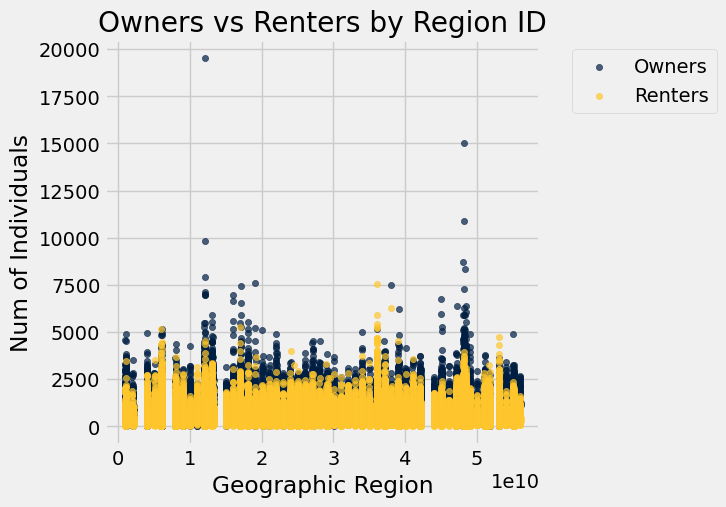

In [139]:
#Display owners versus renters by geographic region
owner_renter = lai_data.select("GEOID", "owner_occupied_hu", "renter_occupied_hu")
owner_renter = owner_renter.relabeled("owner_occupied_hu", "Owners").relabeled("renter_occupied_hu", "Renters")
owner_renter.scatter("GEOID")
plt.xlabel("Geographic Region")
plt.ylabel("Num of Individuals")
plt.title("Owners vs Renters by Region ID")

In [28]:
#Calculate measures of central tendency for each column

#Create table
central_tendency = Table()
#List of column names
columns = make_array("households", "owner_occupied_hu", "renter_occupied_hu", "median_smoc_mortgage", "avg_h_cost", "autos_per_hh_owner", "avg_hh_size", "median_hh_income", "median_rooms_per_renter_hu", "median_rooms_per_owner_hu")

#Declare empty arrays for storing values
range_array = make_array()
median_array = make_array()
mean_array = make_array()
mode_array = make_array()

#Populate above arrays with range, median, mean, and mode of each column
for column in columns:
    c_range = max(lai_data[column]) - min(lai_data[column])
    range_array = np.append(range_array, c_range)
    
    c_median = np.median(lai_data[column])
    median_array = np.append(median_array, c_median)
    
    c_mean = np.mean(lai_data[column])
    mean_array = np.append(mean_array, c_mean)
    
    c_mode = stats.mode(lai_data[column]).mode[0]
    mode_array = np.append(mode_array, c_mode)

#Add all arrays to table
central_tendency = central_tendency.with_columns("Column", columns,
                             "Range", range_array,
                             "Median", median_array,
                             "Mean", mean_array,
                             "Mode", mode_array)
central_tendency

Column,Range,Median,Mean,Mode
households,20431,1547,1646.61,1449
owner_occupied_hu,19517,967,1054.27,793
renter_occupied_hu,7532,475,592.341,235
median_smoc_mortgage,3623,1356,1552.96,4001
avg_h_cost,3762.99,1190.98,1351.45,1067.4
autos_per_hh_owner,3.46479,2.02473,1.98828,2
avg_hh_size,5.66,2.59,2.6503,2.48
median_hh_income,245380,52638,59015,46250
median_rooms_per_renter_hu,12.229,4.5,4.63776,4.3
median_rooms_per_owner_hu,7.6,6.2,6.27182,6.1


## Central Limit Theorem

The following code displays evidence in support of the Central Limit Theorem using data about the distribution of house owners in the United States.

Text(0.5, 1.0, 'Distribution of House Owners in the U.S.')

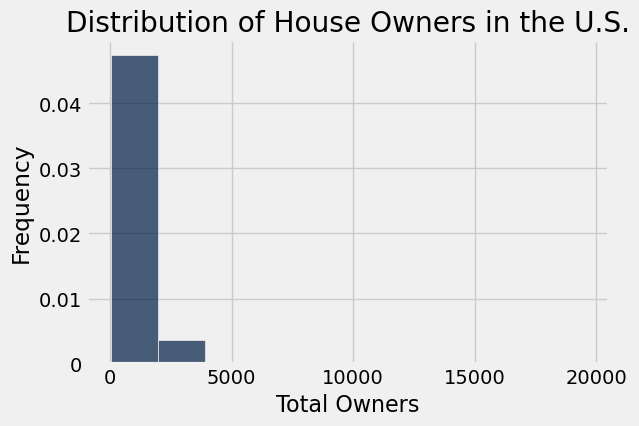

In [29]:
#Display the histogram for owner_occupied_hu
owners = lai_data.select("owner_occupied_hu")
owners.hist()
plt.ylabel("Frequency")
plt.xlabel("Total Owners")
plt.title("Distribution of House Owners in the U.S.")

As seen above, the distribution of owners in this dataset is not normal. However, the central limit theorem states that the distribution of sums or averages of random samples will result in a normal distribution, regardless of the underlying distribution of the data from which it was drawn.

In [30]:
#Calculate average number of owners for a randomly drawn sample (with replacement)
def avg_owners():
    sample = owners.sample(100, with_replacement=True)
    avg_of_sample = np.mean(sample[0])
    return avg_of_sample

avg_owners()

1119.49

In [31]:
#Simulate 10,000 averages
simulated_avgs = make_array()
repetitions = 10000

for i in range(repetitions):
    calc_avg = avg_owners()
    simulated_avgs = np.append(simulated_avgs, calc_avg)

simulated_avgs

array([  957.21,  1044.54,  1052.42, ...,  1082.06,  1087.02,  1069.78])

Text(0.5, 1.0, 'Distribution of Avg Owners in U.S.')

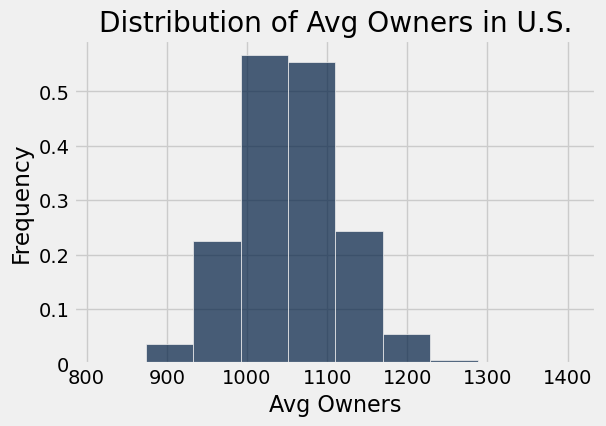

In [32]:
#Display distribution of calculated averages
Table().with_column("Avg Owners", simulated_avgs).hist()
plt.ylabel("Frequency")
plt.title("Distribution of Avg Owners in U.S.")

The distribution above confirms the central limit theorem. The averages of a sample of owners from the population dataset results in a normal distribution, regardless of the fact that the distribution of the population data was nor normal.

# Analyze Data

## Question 1: How does household income and mortgage impact homeownership rates?

To start, the percentage of homeowners must be calculated from the location affordability index. The lai_data dataset contains columns with the number of homes, number of renters of those homes, and the number of homeowners of those homes. This data is displayed below.

In [33]:
#Extract necessary data
lai_data.select("OBJECTID", "households", "owner_occupied_hu", "renter_occupied_hu").sort("OBJECTID")

#OBJECTID is included to show the granularity of the data

OBJECTID,households,owner_occupied_hu,renter_occupied_hu
1,3773,3335,438
2,3217,2588,629
3,1853,914,939
4,1262,836,426
5,2401,1937,464
6,1615,864,751
7,1105,597,508
8,1262,297,965
9,1003,596,407
10,1829,810,1019


To calculate the homeownership rate, divide the number of households by the total number of owner occupied households.

In [34]:
#Calculate homeownership rate
homeownership_rate = lai_data["owner_occupied_hu"] / lai_data["households"]
homeownership_rate

array([ 0.82311734,  0.81388889,  0.81876504, ...,  0.73791103,
        0.80882353,  0.73329426])

This data does not indicate much as just an array. However, adding it as a column to the lai dataset allows for additional analysis. 

In [35]:
#Add homeownership rates to lai dataset as a separate column
lai_data = lai_data.with_column("homeownership_rate", homeownership_rate)
lai_data

OBJECTID,state_name,state_abbreviation,county_name,GEOID,households,owner_occupied_hu,renter_occupied_hu,pct_renters,pct_renter_occupied_hu,pct_transit_j2w_renters,pct_transit_j2w_owners,pct_transit_j2w,median_smoc_mortgage,median_gross_rent,avg_h_cost,autos_per_hh_renters,autos_per_hh_owner,autos_per_hh,commuters_per_hh_renters,commuters_per_hh_owners,commuters_per_hh,avg_hh_size_renters,avg_hh_size_owners,avg_hh_size,area_income_renter_frac,median_hh_income,median_rooms_per_renter_hu,median_rooms_per_owner_hu,median_rooms_per_hu,pct_hu_1_detached,gross_hh_density,area_income_owner_frac,area_income_frac,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,area_type,area_stfid,homeownership_rate
105,Alabama,AL,Autauga County,1001020802,3997,3290,707,16.6118,17.6883,0,0,0,1286,1018,1238.6,1.3918,2.21277,2.06755,0.963225,1.13313,1.10308,2.97,2.63,2.69,0.879972,61242,5.9,6.2,6.1,72.7444,0.0847695,1.29916,1.28622,47614,0.00528086,189.363,0.0241774,0.000911956,3347.18,369.997,18.51,cbsa,33860,0.823117
271,Alabama,AL,Autauga County,1001020801,1080,879,201,17.5393,18.6111,0,0,0,1784,688,1580.02,1.18408,2.43458,2.20185,1.31343,1.20023,1.2213,3.58,2.62,2.8,0.407401,74603,5.2,7.4,7,81.1518,0.0351679,1.74461,1.56683,47614,0.00514493,194.366,0.00537287,0.000879197,2187.87,264.054,15.89,cbsa,33860,0.813889
875,Alabama,AL,Autauga County,1001021100,1247,1021,226,15.0566,18.1235,0,0.33195,0.271789,1063,630,984.525,1.46903,2.07835,1.96792,0.747788,1.18022,1.10184,1.98,2.7,2.57,0.319234,40801,5.6,5.7,5.7,55.8294,0.0105537,0.980552,0.856912,47614,0.00230201,434.403,0.00141337,6.77e-05,1214,131.753,23.91,cbsa,33860,0.818765
876,Alabama,AL,Autauga County,1001021000,1007,836,171,13.2764,16.9811,0,1.31464,1.0914,1284,546,1158.68,1.92398,2.35766,2.28401,1.09357,1.36483,1.31877,2.93,2.85,2.87,0.487456,49567,5.5,6,5.9,64.0528,0.0105341,1.12576,1.04102,47614,0.00305456,327.379,0.00248968,0.000104608,1257.17,132.542,26.65,cbsa,33860,0.830189
877,Alabama,AL,Autauga County,1001020300,1223,860,363,25.5274,29.6811,0,0,0,893,817,870.442,1.16804,2.03023,1.77433,0.809917,1.25349,1.12183,2.39,2.64,2.56,0.603814,51250,4.7,6.2,5.9,87.7637,0.925231,1.17203,1.07636,47614,0.0325306,30.7403,0.560586,0.145253,7137.2,1063.91,14.74,cbsa,33860,0.703189
988,Alabama,AL,Autauga County,1001020900,2109,1674,435,19.163,20.6259,0,0,0,1126,765,1051.54,1.82759,2.49044,2.35372,1.09195,1.13262,1.12423,3.02,2.74,2.79,0.864557,44591,6.1,6.1,6.1,63.2599,0.0291533,1.07145,0.93651,47614,0.00331759,301.424,0.00457551,9.68e-05,1596.56,161.451,22.82,cbsa,33860,0.793741
1281,Alabama,AL,Autauga County,1001020500,4289,2279,2010,44.538,46.8641,0,0,0,1186,981,1089.93,1.57164,1.97982,1.78853,1.15124,1.25362,1.20564,2.26,2.55,2.41,0.771391,52463,4.8,6.6,5.7,66.253,1.52254,1.64956,1.10184,47614,0.035144,28.4543,1.39191,0.492369,7828.88,2019.54,13.25,cbsa,33860,0.531359
1511,Alabama,AL,Autauga County,1001020600,1327,1033,294,19.8381,22.1552,0,0,0,976,784,933.462,1.77551,2.09971,2.02788,1.03741,1.17038,1.14092,3.34,2.67,2.82,1.28448,63750,6.7,6.1,6.2,77.3954,0.669433,1.37088,1.33889,47614,0.0403577,24.7784,0.489842,0.0176565,4196.49,462.392,13.32,cbsa,33860,0.778448
1540,Alabama,AL,Autauga County,1001020100,740,550,190,25.2996,25.6757,0,0,0,1189,783,1084.76,1.71053,2.22182,2.09054,1.3,1.27455,1.28108,3.12,2.58,2.72,1.21561,66000,5.8,6.7,6.3,87.217,0.30487,1.4439,1.38615,47614,0.0234832,42.5836,0.139663,0.00329589,5091.92,581.863,15.81,cbsa,33860,0.743243
1541,Alabama,AL,Autauga County,1001020700,1167,830,337,27.09,28.8775,0,0,0,909,695,847.202,1.41543,1.81446,1.69923,1.21068,1.06867,1.10968,2.58,2.55,2.56,0.475616,45234,4.9,5.8,5.6,52.8135,0.210708,1.11694,0.950015,47614,0.0229305,43.6101,0.284916,0.0292499,6698.92,1068.98,13.25,cbsa,33860,0.711225


Because each row in the lai dataset corresponds to a unique portion of a U.S. state, there are multiple homeownership rates calculated for each state. In order to identify the spread of homeownership rates across the U.S., the average homeownership rate should be calculated for each state. This can be done by grouping the dataset by state, and finding the mean of all homeownership rates within that state.

In [36]:
#Group lai dataset by state, take the mean of the homeownership rate
state_rates = lai_data.select("state_name", "homeownership_rate").group("state_name", np.mean)

#Rename homeownership rate column
avg_state_rates = state_rates.relabeled("homeownership_rate mean", "avg_homeownership_rate")
avg_state_rates

state_name,avg_homeownership_rate
Alabama,0.673318
Alaska,0.639054
Arizona,0.624162
Arkansas,0.656907
California,0.548866
Colorado,0.652362
Connecticut,0.65257
Delaware,0.695738
District of Columbia,0.423381
Florida,0.658405


This dataset can now be plotted to see how homeownership rates vary across the United States.

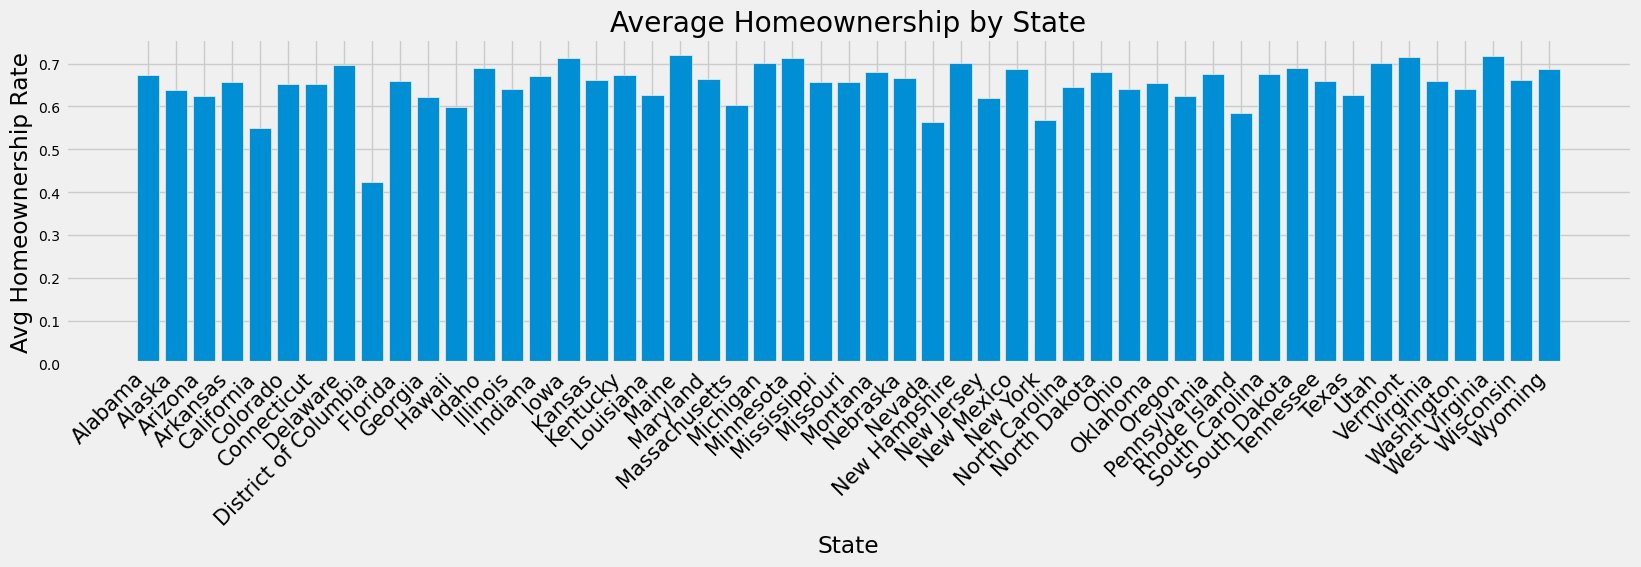

In [37]:
#Plot homeownership rates using matplotlib
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel("State")
plt.ylabel("Avg Homeownership Rate")
plt.title("Average Homeownership by State")
ax = plt.bar(avg_state_rates["state_name"], avg_state_rates["avg_homeownership_rate"])

As can be seen above, most of the states have agerage homeownership rates between 0.6 and 0.7, with some variability. However, there is one rather extreme outlier -- District of Columbia (D.C.). This becomes even more apparant when the data is plotted on a scatter plot, as seen below.

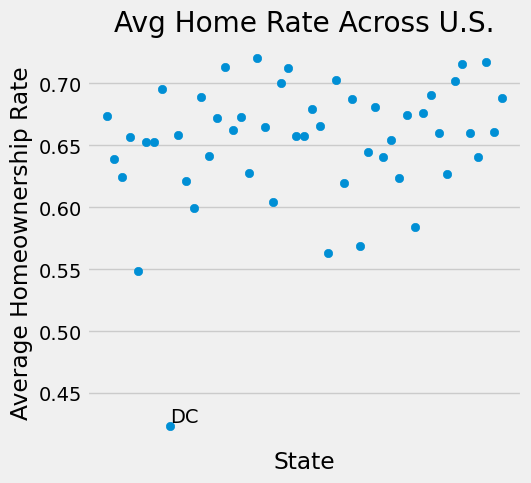

In [38]:
#Extract D.C. homeownership rate
doc_rate = avg_state_rates.where("state_name", are.equal_to("District of Columbia"))["avg_homeownership_rate"][0]

#Plot scatter plot using matplotlib
plt.figure(figsize=(5, 5))
plt.title("Avg Home Rate Across U.S.")
plt.xticks([])
plt.xlabel("State")
plt.ylabel("Average Homeownership Rate")
plt.text("District of Columbia", doc_rate, "DC", va="bottom", ha="left")
plt.scatter(avg_state_rates["state_name"], avg_state_rates["avg_homeownership_rate"])

The scatter plot above highlights the difference in homeownership rates between the District of Columbia and the rest of the United States. Exploring the individual homeownership rates within the D.C. area might reveal an answer.

In [39]:
#Extract D.C. data for each unique region/row identified by the OBJECTID
#The GEOID could also be used to identify each region, but is a longer number and therefore more difficult to read
dc_data = lai_data.where("state_name", are.equal_to("District of Columbia")).select("OBJECTID", "homeownership_rate")
dc_data.sort("OBJECTID")

OBJECTID,homeownership_rate
14019,0.427848
14020,0.770811
14021,0.480234
14022,0.291572
14072,0.494955
14073,0.253377
14074,0.74424
14075,0.271501
14102,0.529603
14103,0.449871


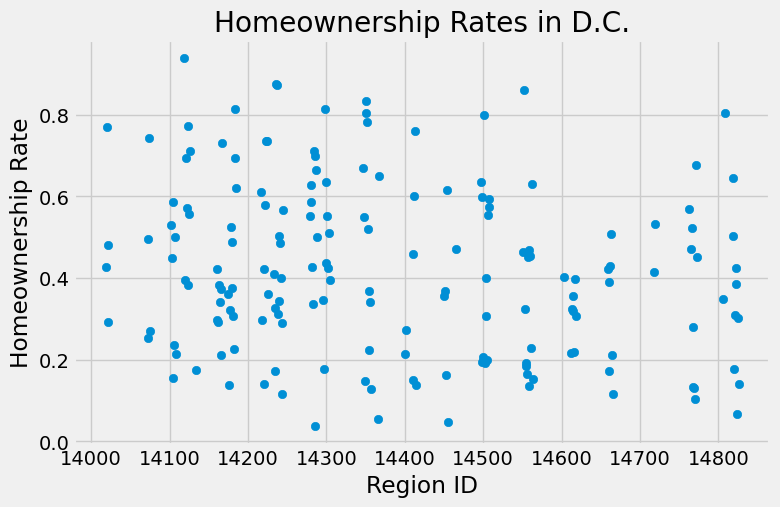

In [40]:
#Display each D.C. homeownership rate to identify spread
#Used matplotlib

plt.figure(figsize=(8, 5))
plt.title("Homeownership Rates in D.C.")
plt.xlabel("Region ID")
plt.ylabel("Homeownership Rate")
plt.scatter(dc_data["OBJECTID"], dc_data["homeownership_rate"])

From the extracted table and scatter plot, it appears that the data greatly varies across DC data entries. Exploring additional columns might indicate why this is. These columns consist of:

- **OBJECTID**: The row ID that helps to identify each portion of DC the data pertains to

- **households**: The number of households in the area of DC data is being gathered on

- **median_smoc_mortgage**: Median mortgage for the area

- **median_hh_income**: Median household income for the area

- **homeownership_rate**: The homeownership rate calculated above for each area

In [41]:
#Extract additional columns
expanded_dc_data = lai_data.where("state_name", are.equal_to("District of Columbia")).select("OBJECTID", "median_smoc_mortgage", "median_hh_income", "homeownership_rate")
expanded_dc_data

OBJECTID,median_smoc_mortgage,median_hh_income,homeownership_rate
14019,2566,91473,0.427848
14020,3167,160412,0.770811
14021,1380,32376,0.480234
14022,1512,33125,0.291572
14072,2092,82054,0.494955
14073,2052,70718,0.253377
14074,3566,203529,0.74424
14075,1736,35357,0.271501
14102,3175,107348,0.529603
14103,2325,79750,0.449871


It appears that there might be some interesting relationships between these columns. For example, as median_smoc_mortgage decreases, so too does homeownership_rate. However, a true relationship cannot be identified simply by looking at the raw data. It would be best to visualize this data to see if there is similar behavior. However, median_hh_income has values that vary greatly compared to homeownership rate, which is between 0 and 1. In order to plot all of this data on one visualization, the values will be standardized.

In [42]:
#Want to standardize across all columns
#First drop OBJECTID
expanded_dc_data = expanded_dc_data.drop("OBJECTID")
expanded_dc_data

median_smoc_mortgage,median_hh_income,homeownership_rate
2566,91473,0.427848
3167,160412,0.770811
1380,32376,0.480234
1512,33125,0.291572
2092,82054,0.494955
2052,70718,0.253377
3566,203529,0.74424
1736,35357,0.271501
3175,107348,0.529603
2325,79750,0.449871


In [43]:
#Turn into DataFrame
dc_data_df = expanded_dc_data.to_df()
dc_data_df

,median_smoc_mortgage,median_hh_income,homeownership_rate
0,2566.0,91473.0,0.427848
1,3167.0,160412.0,0.770811
2,1380.0,32376.0,0.480234
3,1512.0,33125.0,0.291572
4,2092.0,82054.0,0.494955
...,...,...,...
166,2410.0,106806.0,0.386465
167,2167.0,92738.0,0.425984
168,1153.0,14692.0,0.066079
169,1875.0,42054.0,0.303468


In [44]:
#Use DataFrame operations to standardize the entire DataFrame
standard_dc_df = (dc_data_df - dc_data_df.mean()) / dc_data_df.std()
standard_dc_df

,median_smoc_mortgage,median_hh_income,homeownership_rate
0,0.406887,0.280572,0.021381
1,1.231403,1.868106,1.662803
2,-1.220195,-1.080320,0.272101
3,-1.039103,-1.063072,-0.630838
4,-0.243397,0.063670,0.342557
...,...,...,...
166,0.192869,0.633661,-0.176680
167,-0.140504,0.309702,0.012461
168,-1.531618,-1.487549,-1.710045
169,-0.541101,-0.857454,-0.573902


Text(0.5, 1.0, 'Income on Mortgage')

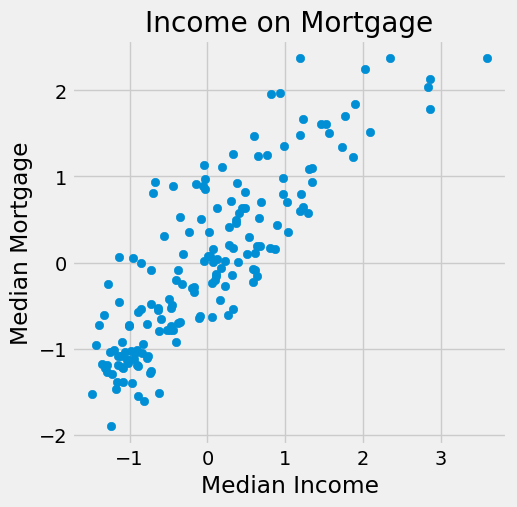

In [113]:
#Plot median income against median mortgage
plt.figure(figsize=(5, 5))
plt.scatter(standard_dc_df["median_hh_income"], standard_dc_df["median_smoc_mortgage"])
plt.xlabel("Median Income")
plt.ylabel("Median Mortgage")
plt.title("Income on Mortgage")

Text(0.5, 1.0, 'Rate on Income')

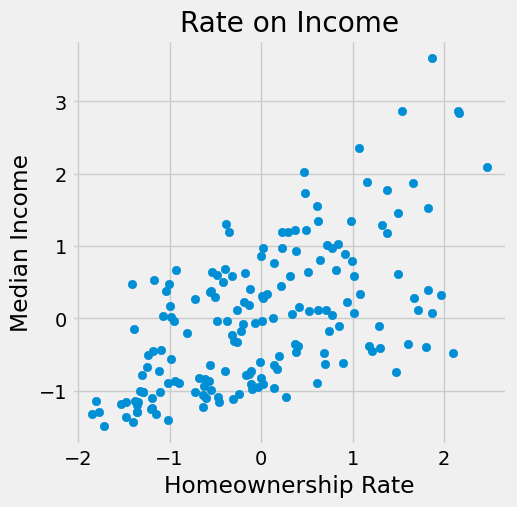

In [115]:
#Plot median income against the homeownership rate
plt.figure(figsize=(5, 5))
plt.scatter(standard_dc_df["homeownership_rate"], standard_dc_df["median_hh_income"])
plt.xlabel("Homeownership Rate")
plt.ylabel("Median Income")
plt.title("Rate on Income")

Text(0.5, 1.0, 'Rate on Mortgage')

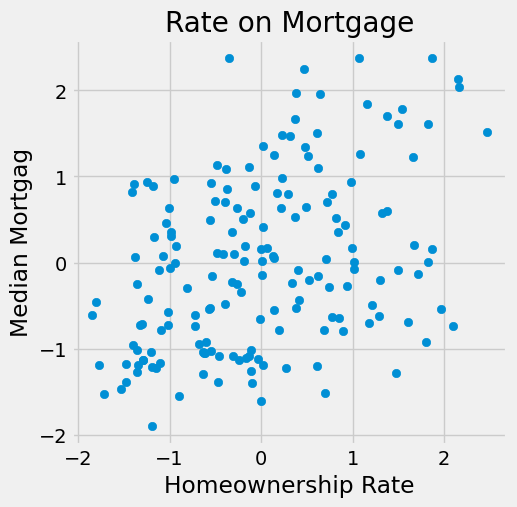

In [117]:
#Plot median mortgage against the homeownership rate
plt.figure(figsize=(5, 5))
plt.scatter(standard_dc_df["homeownership_rate"], standard_dc_df["median_smoc_mortgage"])
plt.xlabel("Homeownership Rate")
plt.ylabel("Median Mortgag")
plt.title("Rate on Mortgage")

From the scatter plots above, it appears that median household income and homeownership rates have a positive linear relationship. Additionally, median household income and median mortgage appear to have a positive linear relationship. This means that as one variable increases, the other is likely to do the same. Median mortgage and homeownership rate appear to have some slight positive linearity, but the data is not as tightly correlated as the other relationships discussed. In order to determine exactly how correlated these various variables are, correlation can be calculated for each pair. Moreover, the following null and alternative hypotheses will be tested using the results of the correlation values calculated.

Hypothesis for median household income and homeownership rates:
- Null Hypothesis: There is no correlation between the median household income and homeownership rate within the D.C. area.
- Alternative Hypothesis: There is a statistical correlation between the median household income and the homeownership rate within the D.C. area.

Hypothesis for median household income and median mortgage:
- Null Hypothesis: There is no correlation between the median household income and median mortgage within the D.C. area.
- Alternative Hypothesis: There is a statistical correlation between the median household income and the homeownership rate within the D.C. area.

Hypothesis for median mortgage and homeownership rates:
- Null Hypothesis: There is no correlation between the median mortgage and the homeownership rate within the D.C. area.
- Alternative Hypothesis: There is a statistical correlation between the median mortgage and the homeownership rate within the D.C. area.

These hypotheses are all rather similar, differing only in the features being compared. Therefore, all hypotheses will be tested together. The cut-off value that will result in a rejection of the null hypothesis is a correlation higher than 0.3. A correlation that is below 0.3 indicates negligible correlation. However, a correlation closer to 1 indicates a stronger correlation. This is the convention used for most correlation hypotheses.

First, it is necessary to turn the DataFrame containing the standardized values into a datascience Table object. 

In [48]:
#Convert DataFrame into Table
standard_dc = Table()
for column in standard_dc_df.columns:
    standard_dc = standard_dc.with_column(column, standard_dc_df[column])
    
standard_dc

median_smoc_mortgage,median_hh_income,homeownership_rate
0.406887,0.280572,0.021381
1.2314,1.86811,1.6628
-1.2202,-1.08032,0.272101
-1.0391,-1.06307,-0.630838
-0.243397,0.0636699,0.342557
-0.298273,-0.197377,-0.813639
1.77879,2.86101,1.53563
-0.731796,-1.01167,-0.726897
1.24238,0.646143,0.508381
0.0762572,0.0106131,0.126785


Now, the correlation can be calculated for each hypothesis.

In [49]:
#Define correlation function
def correlation(t, x, y):
    return np.mean(t.column(x)*t.column(y))

In [50]:
income_mortgage_corr = round(correlation(standard_dc, "median_hh_income", "median_smoc_mortgage"), 2)
income_homerate_corr = round(correlation(standard_dc, "homeownership_rate", "median_hh_income"), 2)
mortgage_homerate_corr = round(correlation(standard_dc, "homeownership_rate", "median_smoc_mortgage"), 2)

print(f"Correlation between income and mortage: {income_mortgage_corr}")
print(f"Correlation between income and homeownership rate: {income_homerate_corr}")
print(f"Correlation between mortgage and homeownerhsip rate: {mortgage_homerate_corr}")

Correlation between income and mortage: 0.85
Correlation between income and homeownership rate: 0.61
Correlation between mortgage and homeownerhsip rate: 0.39


As expected, the correlation between income/mortgage and income/homeownership is much higher than the correlation between mortgage/homeownership. In terms of the stated hypotheses, each calculated correlation is larger than 0.3, so all null hypotheses will be rejected. In other words, there is a statistical correlation between median income and median mortgage, median income and homeownership rates, and median mortgage and homeownership rates. Moreover, all three correlations are positive, indicating a positive linear association. Thus, it can be concluded that a higher homeownership rate is associated with higher median incomes and mortgages. Moreover, as incomes increase, there is a positive change in mortgages as well.

While the individual correlation values are very helpful, it is also important to review the actual regression line against the data. This will help to identify which regression lines are the best fit for the data, and therefore, which features are best correlated.

In [51]:
#Calculate regression line for median income and median mortgage

#In standard units, the regression line is y = r * x
#The values of the regression line will be stored in a column called "Predictions"
income_mortgage_reg = Table().with_columns("Median Mortgage", standard_dc["median_smoc_mortgage"],
                                           "Median Income", standard_dc["median_hh_income"],
                                          "Predictions", income_mortgage_corr * standard_dc["median_hh_income"])
income_mortgage_reg

Median Mortgage,Median Income,Predictions
0.406887,0.280572,0.238486
1.2314,1.86811,1.58789
-1.2202,-1.08032,-0.918272
-1.0391,-1.06307,-0.903611
-0.243397,0.0636699,0.0541194
-0.298273,-0.197377,-0.16777
1.77879,2.86101,2.43186
-0.731796,-1.01167,-0.859922
1.24238,0.646143,0.549221
0.0762572,0.0106131,0.00902116


Text(0.5, 1.0, 'Regression for Income on Mortgage')

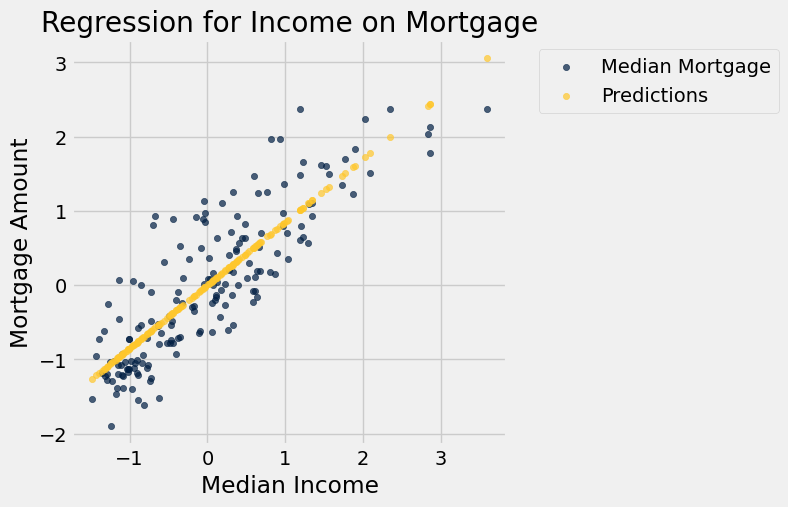

In [118]:
#Display regression predictions for median income
income_mortgage_reg.scatter("Median Income")
plt.ylabel("Mortgage Amount")
plt.title("Regression for Income on Mortgage")

In [53]:
#Calculate regression for median income and homeownership rate
income_home_reg = Table().with_columns("Median Income", standard_dc["median_hh_income"],
                                       "Homeownership Rate", standard_dc["homeownership_rate"],
                                       "Predictions", income_homerate_corr * standard_dc["homeownership_rate"])

income_home_reg

Median Income,Homeownership Rate,Predictions
0.280572,0.021381,0.0130424
1.86811,1.6628,1.01431
-1.08032,0.272101,0.165982
-1.06307,-0.630838,-0.384811
0.0636699,0.342557,0.20896
-0.197377,-0.813639,-0.49632
2.86101,1.53563,0.936735
-1.01167,-0.726897,-0.443407
0.646143,0.508381,0.310112
0.0106131,0.126785,0.0773387


Text(0.5, 1.0, 'Regression for Rate on Income')

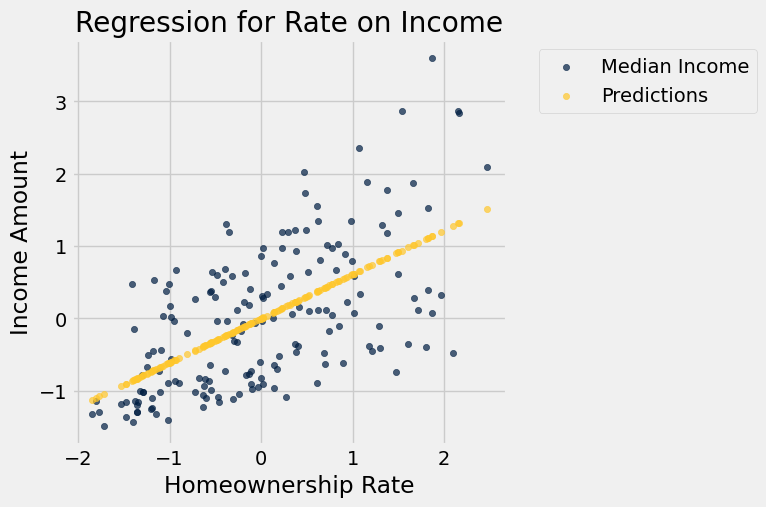

In [140]:
#Visualize regression for homeownership rate from median income
income_home_reg.scatter("Homeownership Rate")
plt.ylabel("Income Amount")
plt.title("Regression for Rate on Income")

In [55]:
#Calculate regression for median mortgage and homeownership rate
mortgage_home_reg = Table().with_columns("Median Mortgage", standard_dc["median_smoc_mortgage"],
                                       "Homeownership Rate", standard_dc["homeownership_rate"],
                                       "Predictions", mortgage_homerate_corr * standard_dc["homeownership_rate"])

mortgage_home_reg

Median Mortgage,Homeownership Rate,Predictions
0.406887,0.021381,0.00833857
1.2314,1.6628,0.648493
-1.2202,0.272101,0.106119
-1.0391,-0.630838,-0.246027
-0.243397,0.342557,0.133597
-0.298273,-0.813639,-0.317319
1.77879,1.53563,0.598896
-0.731796,-0.726897,-0.28349
1.24238,0.508381,0.198268
0.0762572,0.126785,0.0494461


Text(0.5, 1.0, 'Regression for Rate on Mortgage')

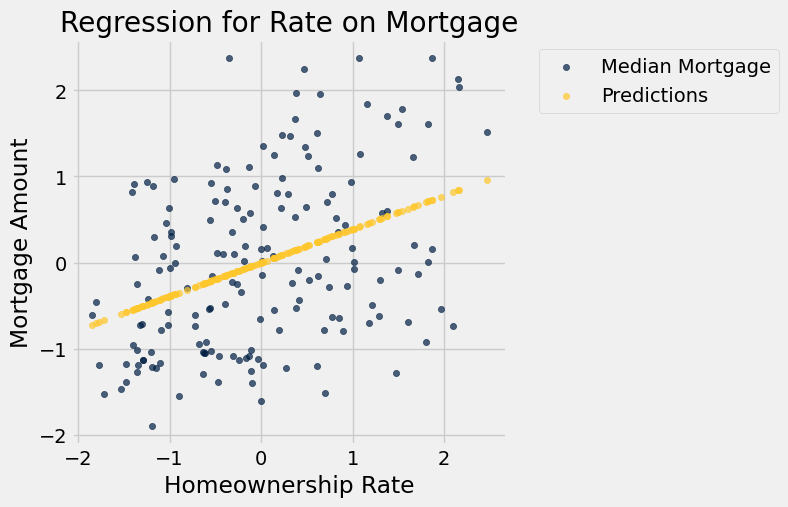

In [120]:
#Visualize regression of homeownership rates from median mortgage
mortgage_home_reg.scatter("Homeownership Rate")
plt.ylabel("Mortgage Amount")
plt.title("Regression for Rate on Mortgage")

The visualizations above all show the regression line in yellow, with the original values in dark blue. At first glance, the first regression (income and mortgage) appears to be a good fit for the data. However, the underlying data seems to level off around 2.5, while the regression line continues going up. This could be an indication that the relationship between income and mortgage is actually non-linear. Additionally, the second regression (income and homeownership rate) seems to curve up around values of 3, while the regression line does not. This could also indicate a non-linear relationship. Finally, the third regression (mortgage and homeownership rate) still appears to be linearly correlated. The residuals of each of these regressions will help to confirm or refute the use of a linear regression model as a predictor.

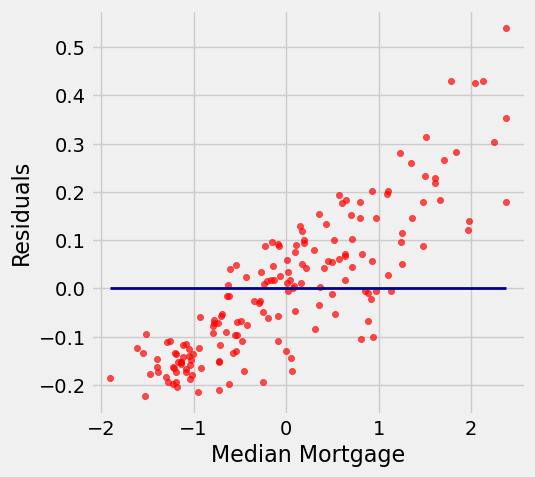

In [57]:
#Calculate and display residuals for first regression (income and mortgage)
income_mortgage_residuals = income_mortgage_reg.with_column("Residuals",
                                                            income_mortgage_reg["Median Income"] - income_mortgage_reg["Predictions"])

income_mortgage_residuals.scatter("Median Mortgage", "Residuals", color="r")
plt.plot(
    make_array(min(income_mortgage_residuals["Median Mortgage"]), max(income_mortgage_residuals["Median Mortgage"])), 
    make_array(0, 0), 
    color="darkblue", 
    lw=2)

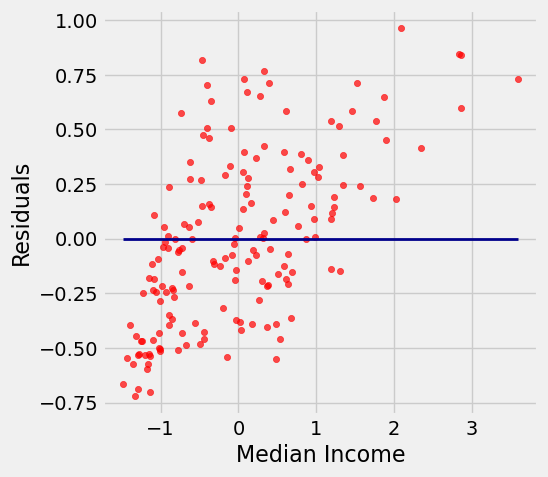

In [58]:
#Calculate and display residuals for second regression (income and homeownership rate)
income_home_residuals = income_home_reg.with_column("Residuals", income_home_reg["Homeownership Rate"] - income_home_reg["Predictions"])

income_home_residuals.scatter("Median Income", "Residuals", color="r")
plt.plot(
    make_array(min(income_home_residuals["Median Income"]), max(income_home_residuals["Median Income"])), 
    make_array(0, 0), 
    color="darkblue", 
    lw=2)

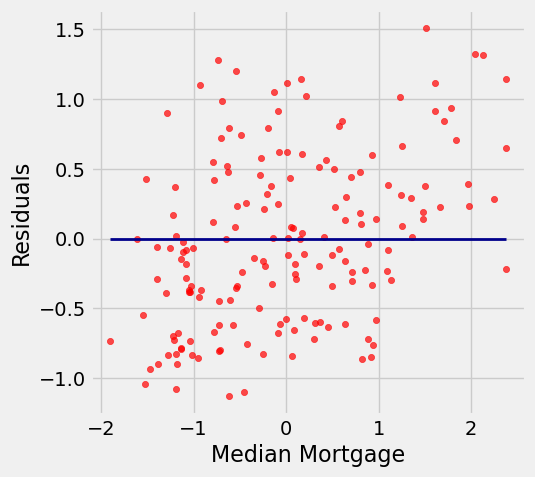

In [59]:
#Calculate and display residuals for third regression (mortgage and homeownership rate)
mortgage_home_residuals = mortgage_home_reg.with_column("Residuals", mortgage_home_reg["Homeownership Rate"] - mortgage_home_reg["Predictions"])

mortgage_home_residuals.scatter("Median Mortgage", "Residuals", color="r")
plt.plot(
    make_array(min(mortgage_home_residuals["Median Mortgage"]), max(mortgage_home_residuals["Median Mortgage"])), 
    make_array(0, 0), 
    color="darkblue", 
    lw=2)

According to the residual plots above, a linear regression is actually still the best fit for these features. However, the distribution of residuals in the first regression indicates that the data is biased and homoscedastic. This means the errors are even distributed for all mortgage values, but that there is bias towards higher incomes for each mortgage. In other words, the regression tends to overestimate for each mortgage value, which is likely due to some individuals having a disproportionately high income compared to their mortgage. As for the second regression, there also appears to be some bias due to a higher concentration of values with smaller incomes and homeownership rates. Moreover, the shape of the residuals indicates heteroscedasticity. This means the errors are more extreme for higher values of incomes rather than smaller values. Thus, the regression does a better job at predicting homeownership rates for smaller incomes than for larger. Finally, the residuals of the third regression do not appear to have a pattern, which means there is no bias, homoscedasticity, or heteroscedasticity. Overall, the relationships between income, mortgage, and homeownership rate are all positively correlated, with some bias introduced due to there being more data on individuals with lower incomes and mortgages. 

The regression analysis conducted above gives a great deal of insights into homeownership rates in the D.C. area. First, there is a statistical correlation between mortgages and incomes, incomes and homeownership rates, and mortgages and homeownership rates. Second, this means that incomes and mortgages have the ability to predict homeownership rates, as seen by the linear regression models calculated for each feature. Therefore, it would not be unreasonable to assume that a wide distribution in incomes and mortgages would result in a wide distribution of homeownership rates. Moreover, the distributions of incomes and mortgages for the D.C. area could help to solidify an answer regarding both the lower-than average homeownership rate for D.C., as well as the extreme variability in homeownership rates within the area.

Text(0.5, 1.0, 'Median Incomes for D.C. Area')

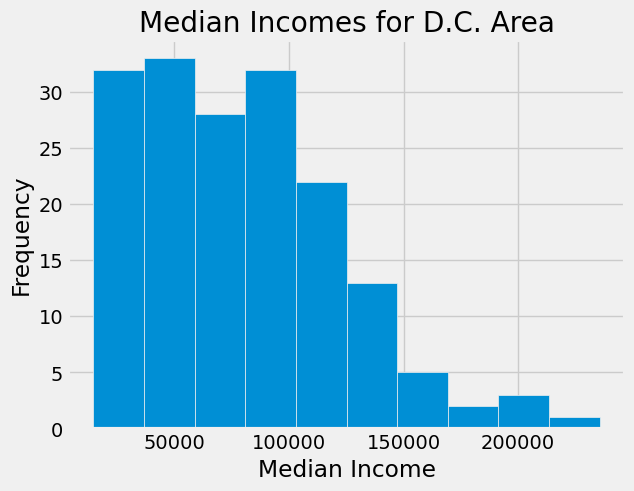

In [60]:
#Plot histogram of D.C. income data
fig = dc_data_df["median_hh_income"].hist()
fig.set_xlabel("Median Income")
fig.set_ylabel("Frequency")
plt.title("Median Incomes for D.C. Area")

According to the histogram above, a majority of the median incomes is between 0 and $100000, with some median incomes reaching as high as 250000. This distribution of incomes provides a possible explanation of such wide-ranging homeownership rates, as well as the lower-than average homeownership rate compared to the rest of the U.S. If median incomes tend to be centered around lower values, then an area with a disproportionately high mortgage amount might result in a number of individuals not being able to own houses. Plotting the distribution of mortgages will reveal more information about this theory. 

Text(0.5, 1.0, 'Median Mortgages for D.C. Area')

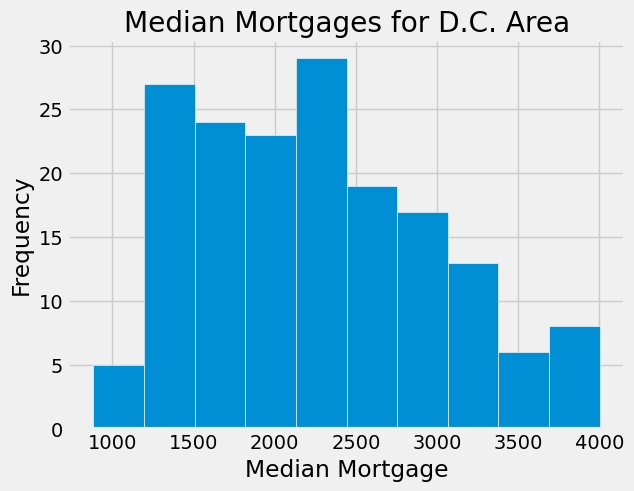

In [61]:
#Plot histogram of median mortgage for the D.C. area
fig = dc_data_df["median_smoc_mortgage"].hist()
fig.set_xlabel("Median Mortgage")
fig.set_ylabel("Frequency")
plt.title("Median Mortgages for D.C. Area")

As seen in the above visualizations, the median incomes are skewed to the right, which means there is a higher concentration of low median incomes with a few very high median incomes. However, the median mortgages are more uniform in nature, centering between 2000 and 2500. While there is some very slight right skewness occurring, it is nowhere near the level of skewness seen in the median income histogram. From these histograms, it can be concluded that the mortgage amounts available are disproportionate to the distribution of median incomes, thereby resulting in a much lower homeownership rate compared to the rest of the U.S. Finally, the wide distribution of median incomes helps to explain the variability in homeownership rates for individual areas within D.C. A concentration of lower-income individuals would result in a lower homeownership rate, whereas a concentration of higher-income individuals would result in a higher homeownership rate. Therefore, it can be concluded that the distribution of incomes is not even across the D.C. area, resulting in some areas with excpetionally high homeownership rates and other areas with exceptionally low homeownership rates. 

### Question 1 Conclusion

Overall, the distribution of homeownership rates across the U.S. tends to be between 0.6 and 0.7, with the exception of the District of Columbia. Upon further analysis of the DC data, it was determined that median income and median mortgage have a strong positive correlation. This makes sense, as people tend to buy bigger houses when they have more money. However, upon exploring these variables separately, it can be concluded that the lower than expected homeownership rate was likely due to mortgages that are not accessible to the vast number of individuals with low incomes. In other words, the housing market has yet to catch up to the lower incomes of those living in the DC area. This can be seen in the above visualizations, where a somewhat equal number of mortgages are available at different amounts, while a vast number of DC residents only have a low income amount. This means there are not enough small houses with smaller mortgages available for the large number of lower income residents. Thus, homeownership rate is lower in D.C. than the rest of the United States.

## Question 2: How strongly correlated are median income and average household cost to the percentage of homeowners across the Midwest?

Before calculating the correlation of income and household cost against the percentage of homeowners in the Midwest, the necessary data must be extracted. Hypotheses must also be declared.

In [62]:
#Refresher on what the raw data looks like
lai_data

OBJECTID,state_name,state_abbreviation,county_name,GEOID,households,owner_occupied_hu,renter_occupied_hu,pct_renters,pct_renter_occupied_hu,pct_transit_j2w_renters,pct_transit_j2w_owners,pct_transit_j2w,median_smoc_mortgage,median_gross_rent,avg_h_cost,autos_per_hh_renters,autos_per_hh_owner,autos_per_hh,commuters_per_hh_renters,commuters_per_hh_owners,commuters_per_hh,avg_hh_size_renters,avg_hh_size_owners,avg_hh_size,area_income_renter_frac,median_hh_income,median_rooms_per_renter_hu,median_rooms_per_owner_hu,median_rooms_per_hu,pct_hu_1_detached,gross_hh_density,area_income_owner_frac,area_income_frac,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,area_type,area_stfid,homeownership_rate
105,Alabama,AL,Autauga County,1001020802,3997,3290,707,16.6118,17.6883,0,0,0,1286,1018,1238.6,1.3918,2.21277,2.06755,0.963225,1.13313,1.10308,2.97,2.63,2.69,0.879972,61242,5.9,6.2,6.1,72.7444,0.0847695,1.29916,1.28622,47614,0.00528086,189.363,0.0241774,0.000911956,3347.18,369.997,18.51,cbsa,33860,0.823117
271,Alabama,AL,Autauga County,1001020801,1080,879,201,17.5393,18.6111,0,0,0,1784,688,1580.02,1.18408,2.43458,2.20185,1.31343,1.20023,1.2213,3.58,2.62,2.8,0.407401,74603,5.2,7.4,7,81.1518,0.0351679,1.74461,1.56683,47614,0.00514493,194.366,0.00537287,0.000879197,2187.87,264.054,15.89,cbsa,33860,0.813889
875,Alabama,AL,Autauga County,1001021100,1247,1021,226,15.0566,18.1235,0,0.33195,0.271789,1063,630,984.525,1.46903,2.07835,1.96792,0.747788,1.18022,1.10184,1.98,2.7,2.57,0.319234,40801,5.6,5.7,5.7,55.8294,0.0105537,0.980552,0.856912,47614,0.00230201,434.403,0.00141337,6.77e-05,1214,131.753,23.91,cbsa,33860,0.818765
876,Alabama,AL,Autauga County,1001021000,1007,836,171,13.2764,16.9811,0,1.31464,1.0914,1284,546,1158.68,1.92398,2.35766,2.28401,1.09357,1.36483,1.31877,2.93,2.85,2.87,0.487456,49567,5.5,6,5.9,64.0528,0.0105341,1.12576,1.04102,47614,0.00305456,327.379,0.00248968,0.000104608,1257.17,132.542,26.65,cbsa,33860,0.830189
877,Alabama,AL,Autauga County,1001020300,1223,860,363,25.5274,29.6811,0,0,0,893,817,870.442,1.16804,2.03023,1.77433,0.809917,1.25349,1.12183,2.39,2.64,2.56,0.603814,51250,4.7,6.2,5.9,87.7637,0.925231,1.17203,1.07636,47614,0.0325306,30.7403,0.560586,0.145253,7137.2,1063.91,14.74,cbsa,33860,0.703189
988,Alabama,AL,Autauga County,1001020900,2109,1674,435,19.163,20.6259,0,0,0,1126,765,1051.54,1.82759,2.49044,2.35372,1.09195,1.13262,1.12423,3.02,2.74,2.79,0.864557,44591,6.1,6.1,6.1,63.2599,0.0291533,1.07145,0.93651,47614,0.00331759,301.424,0.00457551,9.68e-05,1596.56,161.451,22.82,cbsa,33860,0.793741
1281,Alabama,AL,Autauga County,1001020500,4289,2279,2010,44.538,46.8641,0,0,0,1186,981,1089.93,1.57164,1.97982,1.78853,1.15124,1.25362,1.20564,2.26,2.55,2.41,0.771391,52463,4.8,6.6,5.7,66.253,1.52254,1.64956,1.10184,47614,0.035144,28.4543,1.39191,0.492369,7828.88,2019.54,13.25,cbsa,33860,0.531359
1511,Alabama,AL,Autauga County,1001020600,1327,1033,294,19.8381,22.1552,0,0,0,976,784,933.462,1.77551,2.09971,2.02788,1.03741,1.17038,1.14092,3.34,2.67,2.82,1.28448,63750,6.7,6.1,6.2,77.3954,0.669433,1.37088,1.33889,47614,0.0403577,24.7784,0.489842,0.0176565,4196.49,462.392,13.32,cbsa,33860,0.778448
1540,Alabama,AL,Autauga County,1001020100,740,550,190,25.2996,25.6757,0,0,0,1189,783,1084.76,1.71053,2.22182,2.09054,1.3,1.27455,1.28108,3.12,2.58,2.72,1.21561,66000,5.8,6.7,6.3,87.217,0.30487,1.4439,1.38615,47614,0.0234832,42.5836,0.139663,0.00329589,5091.92,581.863,15.81,cbsa,33860,0.743243
1541,Alabama,AL,Autauga County,1001020700,1167,830,337,27.09,28.8775,0,0,0,909,695,847.202,1.41543,1.81446,1.69923,1.21068,1.06867,1.10968,2.58,2.55,2.56,0.475616,45234,4.9,5.8,5.6,52.8135,0.210708,1.11694,0.950015,47614,0.0229305,43.6101,0.284916,0.0292499,6698.92,1068.98,13.25,cbsa,33860,0.711225


In [63]:
#Get data on midwest states only
midwest_states = ["Ohio", "Indiana", "Wisconsin", "Illinois", "Minnesota", "Iowa", "Missouri", "South Dakota", "North Dakota", "Nebraska", "Kansas", "Michigan"]

midwest_all_data = lai_data.where("state_name", are.contained_in(midwest_states))
midwest_all_data

OBJECTID,state_name,state_abbreviation,county_name,GEOID,households,owner_occupied_hu,renter_occupied_hu,pct_renters,pct_renter_occupied_hu,pct_transit_j2w_renters,pct_transit_j2w_owners,pct_transit_j2w,median_smoc_mortgage,median_gross_rent,avg_h_cost,autos_per_hh_renters,autos_per_hh_owner,autos_per_hh,commuters_per_hh_renters,commuters_per_hh_owners,commuters_per_hh,avg_hh_size_renters,avg_hh_size_owners,avg_hh_size,area_income_renter_frac,median_hh_income,median_rooms_per_renter_hu,median_rooms_per_owner_hu,median_rooms_per_hu,pct_hu_1_detached,gross_hh_density,area_income_owner_frac,area_income_frac,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,area_type,area_stfid,homeownership_rate
20971,Illinois,IL,Adams County,17001000600,1644,992,652,34.7919,39.6594,3.01587,0,1.19608,1158,610,940.667,1.07362,2.05645,1.66667,0.966258,1.30544,1.17092,1.87,2.5,2.25,0.592585,44324,4.2,7.8,6.3,66.9691,2.43649,1.51791,0.928971,47713,0.131902,7.58137,4.19271,0.171918,19042,2044.75,15.65,cbsa,39500,0.603406
20972,Illinois,IL,Adams County,17001000700,738,74,664,73.9421,89.9729,2.50627,0,2.25496,886,504,542.304,0.831325,1.85135,0.933604,0.600904,1.22973,0.663957,1.45,2.22,1.53,0.3533,17850,3.2,6.2,3.3,16.9265,2.2026,0.93266,0.374112,47713,0.259656,3.85125,13.9796,0.72823,17491.5,1561.34,25.28,cbsa,39500,0.100271
21111,Illinois,IL,Adams County,17001000800,1155,384,771,58.6312,66.7532,11.0902,5.026,9.07407,686,512,569.849,0.671855,1.90625,1.08225,0.690013,1.5026,0.960173,2.13,2.35,2.2,0.327626,26012,4.2,6.2,4.7,50.1901,1.9745,0.876449,0.545176,47713,0.208562,4.79473,2.13178,0.10941,12938.5,1305.13,14.36,cbsa,39500,0.332468
21166,Illinois,IL,Adams County,17001000201,858,675,183,18.5598,21.3287,0,1.95783,1.54025,829,721,805.965,1.13115,1.76444,1.62937,0.825137,0.983704,0.949883,2.19,2.24,2.23,0.561084,41538,4.8,5.7,5.5,70.7911,1.08292,0.990694,0.87058,47713,0.0795151,12.5762,1.27098,0.253691,12089.8,1636.48,3.25,cbsa,39500,0.786713
21167,Illinois,IL,Adams County,17001000100,2185,1805,380,16.7327,17.3913,0,0,0,973,850,951.609,1.39211,1.66482,1.61739,1.07632,0.959557,0.979863,1.99,2.1,2.08,0.933896,54550,4.6,5.3,5.2,80.4051,0.683487,1.16907,1.14329,47713,0.0547415,18.2677,2.36421,0.464834,16031.1,2734.25,13.37,cbsa,39500,0.826087
21246,Illinois,IL,Adams County,17001001002,1309,968,341,24.3746,26.0504,0,0,0,972,867,944.647,1.04106,1.93802,1.70435,0.454545,1.25723,1.04813,1.97,2.87,2.64,0.653386,54511,4.3,6.7,6.1,80.1287,1.72176,1.38665,1.14248,47713,0.118379,8.44743,1.10356,0.556382,9779.81,1355.76,3.99,cbsa,39500,0.739496
21345,Illinois,IL,Adams County,17001001001,1513,1193,320,20.3304,21.15,0,0,0,843,868,848.288,1.5125,1.8969,1.8156,1.03438,1.18776,1.15532,2.38,2.36,2.36,0.672039,49963,5.4,6.2,6,93.5197,3.75721,1.0673,1.04716,47713,0.206112,4.85172,0.561222,0.00496656,16677.1,1868.77,11.38,cbsa,39500,0.7885
21346,Illinois,IL,Adams County,17001000900,1096,699,397,30.9914,36.2226,0,0,0,695,572,650.446,1.28967,1.75107,1.58394,1.09572,1.07582,1.08303,2.45,2.43,2.44,0.715214,40475,4.1,6.1,5.6,76.2685,2.46693,0.992497,0.848301,47713,0.141804,7.05201,0.832815,0.0517696,17069.1,1713.69,3.84,cbsa,39500,0.637774
21481,Illinois,IL,Adams County,17001001100,3528,2274,1254,35.0671,35.5442,0,0,0,1433,659,1157.89,1.38836,2.14116,1.87358,0.626794,1.3584,1.09836,1.82,2.57,2.3,0.62025,56243,3.9,7.1,6.1,68.3166,1.1119,1.66131,1.17878,47713,0.0570446,17.5301,1.05265,0.258119,14604.5,2767.15,3.98,cbsa,39500,0.644558
21602,Illinois,IL,Adams County,17001000400,1390,678,712,38.8859,51.223,0,0,0,774,557,662.846,0.919944,1.79794,1.3482,0.730337,1.11799,0.919424,2.1,2.42,2.25,0.30914,28819,4.4,6.1,5.3,64.0087,1.26192,0.964706,0.604007,47713,0.159783,6.2585,1.48979,0.206083,14699.3,1452.49,30.61,cbsa,39500,0.48777


In [64]:
#Get median income, average household cost, and homeownership rate for midwest states
midwest_data = midwest_all_data.select("state_name", "median_hh_income", "avg_h_cost", "homeownership_rate")
midwest_data

state_name,median_hh_income,avg_h_cost,homeownership_rate
Illinois,44324,940.667,0.603406
Illinois,17850,542.304,0.100271
Illinois,26012,569.849,0.332468
Illinois,41538,805.965,0.786713
Illinois,54550,951.609,0.826087
Illinois,54511,944.647,0.739496
Illinois,49963,848.288,0.7885
Illinois,40475,650.446,0.637774
Illinois,56243,1157.89,0.644558
Illinois,28819,662.846,0.48777


Text(0.5, 1.0, 'Midwest Avg Homeownership Rate Distribution')

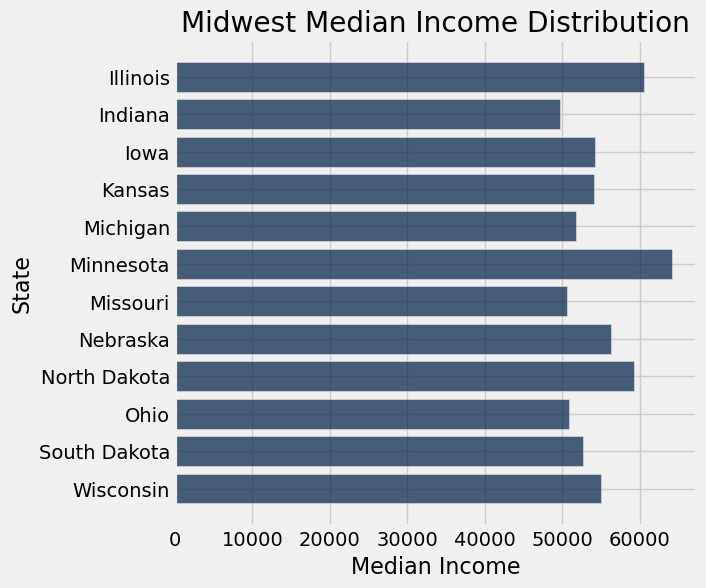

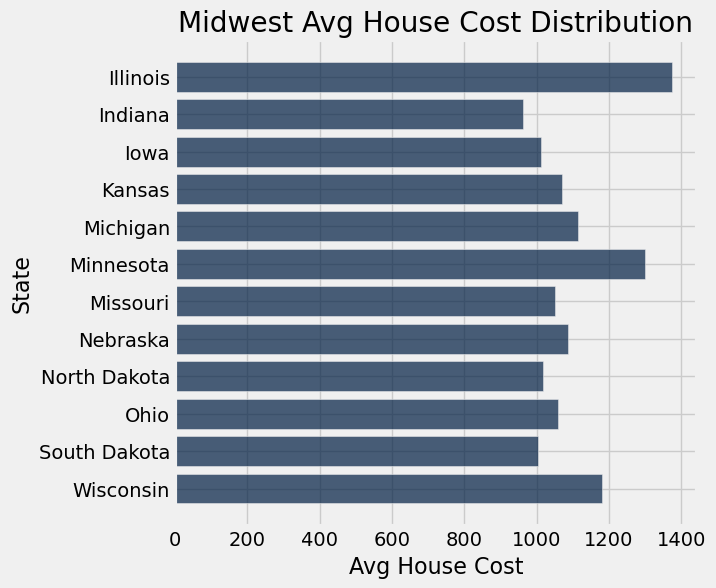

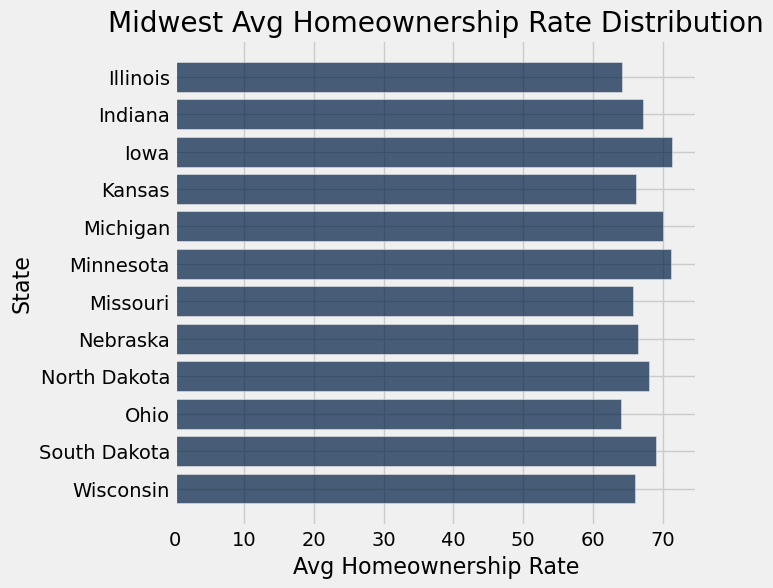

In [123]:
midwest_group = midwest_data.group("state_name", np.mean)

midwest_group_new = Table().with_columns("State", midwest_group["state_name"],
                                        "Median Income", midwest_group["median_hh_income mean"],
                                        "Avg House Cost", midwest_group["avg_h_cost mean"],
                                        "Avg Homeownership Rate", midwest_group["homeownership_rate mean"] * 100)

midwest_group_new.barh("State", "Median Income")
plt.title("Midwest Median Income Distribution")
midwest_group_new.barh("State", "Avg House Cost")
plt.title("Midwest Avg House Cost Distribution")
midwest_group_new.barh("State", "Avg Homeownership Rate")
plt.title("Midwest Avg Homeownership Rate Distribution")

Note that average house cost is in hundred of thousands of dollars. For example, 940.667 is actually $940,667. Also, note that the average house cost is, of course, an average. This means certain values may seem large compared to the median household income because the underlying data from which the average was derived could be skewed right. In other words, very large values could be pulling the average away from the bulk of the smaller values. Because the underlying data cannot be accessed, this is only an assumption, but will be assumed for the remainder of the analysis.

The hypotheses for each variable are described below.

Hypotheses for income on homeownership rates:
- Null Hypothesis: There is no correlation between median income and the homeownership rate in midwest states.
- Alternative Hypothesis: There is a statistical correlation between median income and the homeownership rate in midwest states.

Hypotheses for average household cost on homeownership rates:
- Null Hypothesis: There is no correlation between average household cost and the homeownership rate in midwest states.
- Alternative Hypothesis: There is a statistical correlation between average household cost and the homeownership rate in midwest states.
    
A correlation above 0.3 (or below -0.3 for negative correlation) would indicate a statistical correlation, and the null hypothesis would be rejected. 

With the data now extracted, standard values and correlations can be calculated using the correlation function defined in the previous question.

In [66]:
#Calculate means and standard deviations
income_mean = np.mean(midwest_data["median_hh_income"])
income_std = np.std(midwest_data["median_hh_income"])

hcost_mean = np.mean(midwest_data["avg_h_cost"])
hcost_std = np.mean(midwest_data["avg_h_cost"])

hrate_mean = np.mean(midwest_data["homeownership_rate"])
hrate_std = np.mean(midwest_data["homeownership_rate"])

In [67]:
#Standardize values and create new table
standard_midwest = Table().with_columns("Median Income", ((midwest_data["median_hh_income"] - income_mean) / income_std),
                                       "Average House Cost", ((midwest_data["avg_h_cost"] - hcost_mean) / hcost_std),
                                       "Homeownership Rate", ((midwest_data["homeownership_rate"] - hrate_mean) / hrate_std))

standard_midwest

Median Income,Average House Cost,Homeownership Rate
-0.440056,-0.177067,-0.0971513
-1.5692,-0.525571,-0.849969
-1.22108,-0.501473,-0.502544
-0.558883,-0.294909,0.177122
-0.00390552,-0.167494,0.236035
-0.00556891,-0.173585,0.106473
-0.199546,-0.257884,0.179795
-0.604221,-0.430963,-0.0457289
0.0683029,0.0129671,-0.0355782
-1.10136,-0.420115,-0.270173


Text(0.5, 1.0, 'Rate on Income for Midwest')

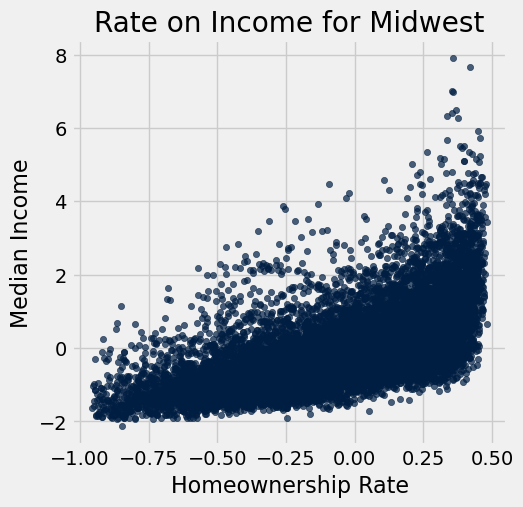

In [141]:
#Visualize median income on homeownership rates
standard_midwest.scatter("Homeownership Rate", "Median Income")
plt.title("Rate on Income for Midwest")

Text(0.5, 1.0, 'Rate on House Cost for Midwest')

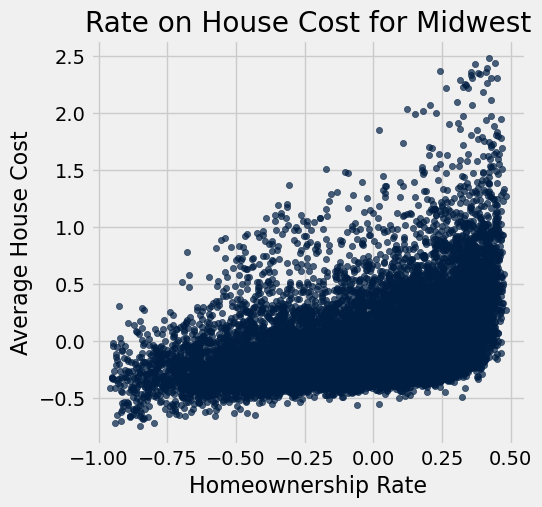

In [142]:
#Visualize average house cost on homeownership rate
standard_midwest.scatter("Homeownership Rate", "Average House Cost")
plt.title("Rate on House Cost for Midwest")

From the above visualizations, it appears that the relationships between median income/homeownership rate and average house cost/homeownership rate are not linear. Instead, they appear to be exponentially correlated, with a gradual increase followed by a sharp increase for both variables. However, for the sake of the hypothesis test, correlations will still be calculated to either confirm or deny the observations from the above visualizations. 

In [70]:
income_hrate_corr = round(correlation(standard_midwest, "Homeownership Rate", "Median Income"), 2)
hcost_hrate_corr = round(correlation(standard_midwest, "Homeownership Rate", "Average House Cost", ), 2)

print(f"Correlation of income and homeownership rate: {income_hrate_corr}")
print(f"Correlation of house cost and homeownership rate: {hcost_hrate_corr}")

Correlation of income and homeownership rate: 0.18
Correlation of house cost and homeownership rate: 0.04


As expected, the correlation between income/homeownership and house cost/homeownership is very low. With both correlations below 0.3, the null hypothesis is supported. Therefore, there is no linear correlation between median income and homeownership rates or average house cost and homeownership rates.

### Question 2 Conclusion

Overall, there is no linear correlation between median income, average household cost, and the homeownership rate in the Midwest. However, there appears to be an exponential relationship between median income/homeownership rate and average household cost/homeownership rate. Therefore, even though there is no linear relationship, there is still a relationship between these variables that should be taken note of.

## Question 3: Does a higher homeownership rate indicate a higher number of cars per owner?

To answer this question, the following steps will be taken:
1. Extract necessary columns from lai dataset
2. Standardize values
3. Create a scatter plot to observe the relationship
4. Calculate the correlation between variables
5. If null hypothesis is rejected, perform regression analysis

For this question, a formal hypothesis test will be performed, and the correlation will be calculated to either support or reject the null hypothesis described below.
- Null Hypothesis: There is no positive correlation between the number of cars per household and the homeownership rate.
- Alternative Hypothesis: There is a positive correlation between the number of cars per household and the homeownership rate.

A correlation value below 0.3 will indicate no positive correlation, and will be in support of the null hypothesis. Therefore, 0.3 is the correlation cut-off value for this hypothesis test. 

In [71]:
#Extract columns
car_data = lai_data.select("state_name", "autos_per_hh_owner", "homeownership_rate")

Text(0.5, 1.0, 'Cars on Rate')

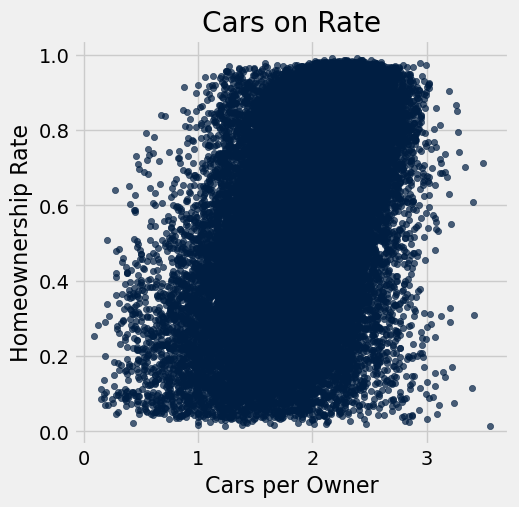

In [126]:
#Display the average cars per household and the homeownership rate
car_data.scatter("autos_per_hh_owner", "homeownership_rate")
plt.xlabel("Cars per Owner")
plt.ylabel("Homeownership Rate")
plt.title("Cars on Rate")

The above visualization shows a slight positive linear correlation. However, there are so many data points that it is difficult to identify a true pattern in the dataset. Because this question is concerned with all states across the United States, the dataset can be grouped by state, making it easier to work with. For each state, the average of all cars per owner and homeownership rates will be taken. 

In [73]:
#Group car_data by states, taking the average of autos_per_hh_owner and homeownership_rate, respectively
car_data_states = car_data.group("state_name", np.mean).relabeled("autos_per_hh_owner mean", "Avg Cars per Owner").relabeled("homeownership_rate mean", "Avg Homeownership Rate")
car_data_states

state_name,Avg Cars per Owner,Avg Homeownership Rate
Alabama,2.05803,0.673318
Alaska,2.00624,0.639054
Arizona,1.94223,0.624162
Arkansas,2.02549,0.656907
California,2.17242,0.548866
Colorado,2.13919,0.652362
Connecticut,2.01829,0.65257
Delaware,1.93818,0.695738
District of Columbia,1.24974,0.423381
Florida,1.76736,0.658405


Text(0.5, 1.0, 'Cars on Rate per State')

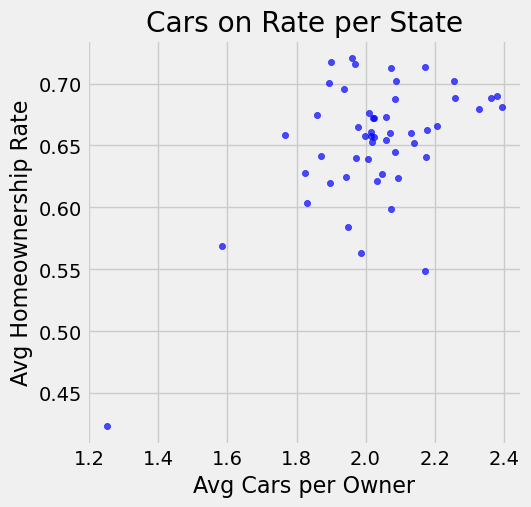

In [127]:
#Visualize car data by state
car_data_states.scatter("Avg Cars per Owner", "Avg Homeownership Rate", color="b")
plt.title("Cars on Rate per State")

This visualization is much easier to understand. It also appears to have a slight linear correlation, with a majority of the data clustered between 0.6 and 0.7. This was also discovered in Question 1, and is not surprising. Knowing this, a correlation analysis can be conducted.

In [75]:
#Standardize values

#Calculate mean and standard deviation of autos per household column
cars_mean = np.mean(car_data_states["Avg Cars per Owner"])
cars_std = np.std(car_data_states["Avg Cars per Owner"])

#Calculate mean and standard deviation of homeownership rate column
rate_mean = np.mean(car_data_states["Avg Homeownership Rate"])
rate_std = np.std(car_data_states["Avg Homeownership Rate"])

standard_car = Table().with_columns("Avg Cars per Owner", ((car_data_states["Avg Cars per Owner"] - cars_mean) / cars_std),
                                  "Avg Homeownership Rate", ((car_data_states["Avg Homeownership Rate"] - rate_mean) / rate_std))
standard_car

Avg Cars per Owner,Avg Homeownership Rate
0.157586,0.411024
-0.116041,-0.260143
-0.4542,-0.551836
-0.0143231,0.0895562
0.761886,-2.02671
0.586357,0.000535678
-0.0523822,0.0046084
-0.475597,0.850167
-4.1127,-4.48468
-1.37805,0.11891


Text(0.5, 1.0, 'Rate on Cars per State (SU)')

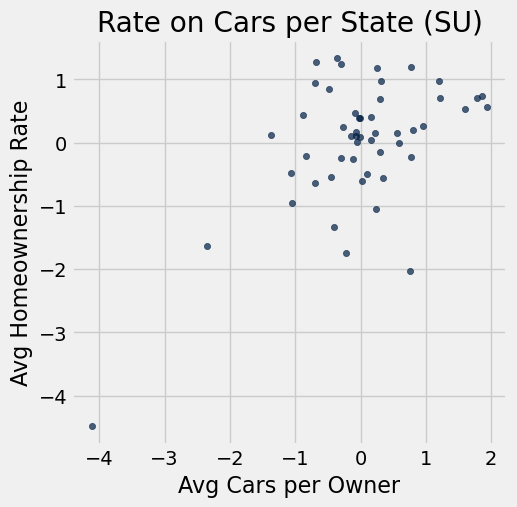

In [128]:
#Visualize standard values
standard_car.scatter("Avg Cars per Owner", "Avg Homeownership Rate")
plt.title("Rate on Cars per State (SU)")

In [77]:
#Calculate correlation between cars per owner and homeownership rates
car_corr = correlation(standard_car, "Avg Cars per Owner", "Avg Homeownership Rate")
car_corr

0.56613051894542266

With a correlation of 0.57, the null hypothesis is rejected. This means there is a positive correlation between the number of cars per owner and the homeownership rate in the United States. A regression analysis can be performed to identify the regression line, as well as the error between the regression line and observed values.

In [78]:
#Calculate predicted values from regression line
def regression_line(x, r):
    prediction = r * x
    return prediction

hrate_predictions = standard_car.with_column("Predictions", standard_car["Avg Cars per Owner"] * car_corr)

hrate_predictions

Avg Cars per Owner,Avg Homeownership Rate,Predictions
0.157586,0.411024,0.0892142
-0.116041,-0.260143,-0.0656946
-0.4542,-0.551836,-0.257137
-0.0143231,0.0895562,-0.00810876
0.761886,-2.02671,0.431327
0.586357,0.000535678,0.331954
-0.0523822,0.0046084,-0.0296551
-0.475597,0.850167,-0.26925
-4.1127,-4.48468,-2.32833
-1.37805,0.11891,-0.780154


Text(0.5, 1.0, 'Regression for Cars on Rate')

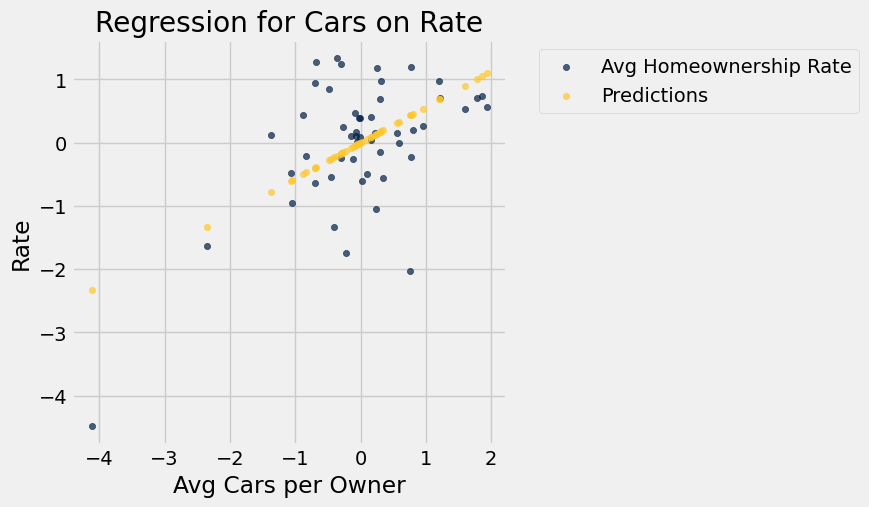

In [129]:
#Visualize regression line
hrate_predictions.scatter("Avg Cars per Owner")
plt.ylabel("Rate")
plt.title("Regression for Cars on Rate")

In [80]:
#Calculate residuals
car_residuals = hrate_predictions.with_column("Residuals", hrate_predictions["Avg Homeownership Rate"] - hrate_predictions["Predictions"])
car_residuals

Avg Cars per Owner,Avg Homeownership Rate,Predictions,Residuals
0.157586,0.411024,0.0892142,0.32181
-0.116041,-0.260143,-0.0656946,-0.194448
-0.4542,-0.551836,-0.257137,-0.294699
-0.0143231,0.0895562,-0.00810876,0.0976649
0.761886,-2.02671,0.431327,-2.45804
0.586357,0.000535678,0.331954,-0.331419
-0.0523822,0.0046084,-0.0296551,0.0342635
-0.475597,0.850167,-0.26925,1.11942
-4.1127,-4.48468,-2.32833,-2.15636
-1.37805,0.11891,-0.780154,0.899064


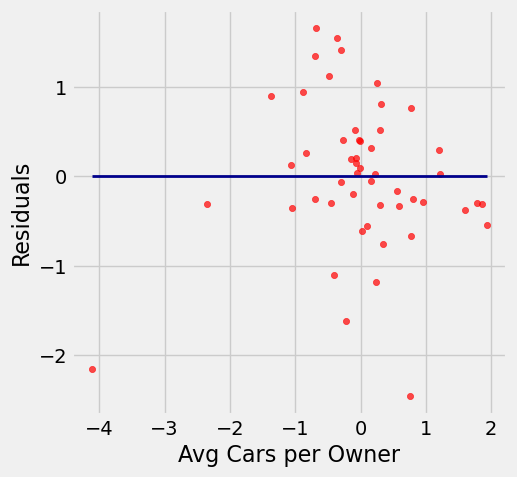

In [81]:
#Visualize residuals
line_range = make_array(min(car_residuals["Avg Cars per Owner"]), max(car_residuals["Avg Cars per Owner"]))
car_residuals.scatter("Avg Cars per Owner", "Residuals", color="r")
plt.plot(line_range, make_array(0, 0), color="darkblue", lw=2)

From the regression model and residuals, it is confirmed that a linear regression model is the best fit for this data. In other words, there is no pattern in the visualization of the residuals, so the calcualted linear regression line is a good fit for the data. The residuals do not indicate exactly how well the regression fits, only that it does.

### Question 3 Conclusion

As expected, the correlation between the number of cars per owner and the homeownership rate is positively correlated. From this, it can be concluded that a family with a higher number of cars are more likely to also have a house than those who have a smaller number of cars. It is important to note, however, that just because someone has multiple cars does not mean they will automatically have a house. Moreover, a high homeownership rate for a certain area does not necessarily mean the families within those houses have multiple cars. The correlation statistic simply means that the behavior of homeownership rates and cars per family increases together, which is further supported by the calculated regression line.

## Question 4: Does the classification of renter versus owner impact house size and the number of rooms in a house?

To start answering this question, the necessary data will be extracted and aggregated accordingly.

In [82]:
#Review raw data
lai_data

OBJECTID,state_name,state_abbreviation,county_name,GEOID,households,owner_occupied_hu,renter_occupied_hu,pct_renters,pct_renter_occupied_hu,pct_transit_j2w_renters,pct_transit_j2w_owners,pct_transit_j2w,median_smoc_mortgage,median_gross_rent,avg_h_cost,autos_per_hh_renters,autos_per_hh_owner,autos_per_hh,commuters_per_hh_renters,commuters_per_hh_owners,commuters_per_hh,avg_hh_size_renters,avg_hh_size_owners,avg_hh_size,area_income_renter_frac,median_hh_income,median_rooms_per_renter_hu,median_rooms_per_owner_hu,median_rooms_per_hu,pct_hu_1_detached,gross_hh_density,area_income_owner_frac,area_income_frac,area_median_hh_income,block_density,avg_block_acres,job_density_simple,retail_density_simple,job_gravity,retail_gravity,median_commute,area_type,area_stfid,homeownership_rate
105,Alabama,AL,Autauga County,1001020802,3997,3290,707,16.6118,17.6883,0,0,0,1286,1018,1238.6,1.3918,2.21277,2.06755,0.963225,1.13313,1.10308,2.97,2.63,2.69,0.879972,61242,5.9,6.2,6.1,72.7444,0.0847695,1.29916,1.28622,47614,0.00528086,189.363,0.0241774,0.000911956,3347.18,369.997,18.51,cbsa,33860,0.823117
271,Alabama,AL,Autauga County,1001020801,1080,879,201,17.5393,18.6111,0,0,0,1784,688,1580.02,1.18408,2.43458,2.20185,1.31343,1.20023,1.2213,3.58,2.62,2.8,0.407401,74603,5.2,7.4,7,81.1518,0.0351679,1.74461,1.56683,47614,0.00514493,194.366,0.00537287,0.000879197,2187.87,264.054,15.89,cbsa,33860,0.813889
875,Alabama,AL,Autauga County,1001021100,1247,1021,226,15.0566,18.1235,0,0.33195,0.271789,1063,630,984.525,1.46903,2.07835,1.96792,0.747788,1.18022,1.10184,1.98,2.7,2.57,0.319234,40801,5.6,5.7,5.7,55.8294,0.0105537,0.980552,0.856912,47614,0.00230201,434.403,0.00141337,6.77e-05,1214,131.753,23.91,cbsa,33860,0.818765
876,Alabama,AL,Autauga County,1001021000,1007,836,171,13.2764,16.9811,0,1.31464,1.0914,1284,546,1158.68,1.92398,2.35766,2.28401,1.09357,1.36483,1.31877,2.93,2.85,2.87,0.487456,49567,5.5,6,5.9,64.0528,0.0105341,1.12576,1.04102,47614,0.00305456,327.379,0.00248968,0.000104608,1257.17,132.542,26.65,cbsa,33860,0.830189
877,Alabama,AL,Autauga County,1001020300,1223,860,363,25.5274,29.6811,0,0,0,893,817,870.442,1.16804,2.03023,1.77433,0.809917,1.25349,1.12183,2.39,2.64,2.56,0.603814,51250,4.7,6.2,5.9,87.7637,0.925231,1.17203,1.07636,47614,0.0325306,30.7403,0.560586,0.145253,7137.2,1063.91,14.74,cbsa,33860,0.703189
988,Alabama,AL,Autauga County,1001020900,2109,1674,435,19.163,20.6259,0,0,0,1126,765,1051.54,1.82759,2.49044,2.35372,1.09195,1.13262,1.12423,3.02,2.74,2.79,0.864557,44591,6.1,6.1,6.1,63.2599,0.0291533,1.07145,0.93651,47614,0.00331759,301.424,0.00457551,9.68e-05,1596.56,161.451,22.82,cbsa,33860,0.793741
1281,Alabama,AL,Autauga County,1001020500,4289,2279,2010,44.538,46.8641,0,0,0,1186,981,1089.93,1.57164,1.97982,1.78853,1.15124,1.25362,1.20564,2.26,2.55,2.41,0.771391,52463,4.8,6.6,5.7,66.253,1.52254,1.64956,1.10184,47614,0.035144,28.4543,1.39191,0.492369,7828.88,2019.54,13.25,cbsa,33860,0.531359
1511,Alabama,AL,Autauga County,1001020600,1327,1033,294,19.8381,22.1552,0,0,0,976,784,933.462,1.77551,2.09971,2.02788,1.03741,1.17038,1.14092,3.34,2.67,2.82,1.28448,63750,6.7,6.1,6.2,77.3954,0.669433,1.37088,1.33889,47614,0.0403577,24.7784,0.489842,0.0176565,4196.49,462.392,13.32,cbsa,33860,0.778448
1540,Alabama,AL,Autauga County,1001020100,740,550,190,25.2996,25.6757,0,0,0,1189,783,1084.76,1.71053,2.22182,2.09054,1.3,1.27455,1.28108,3.12,2.58,2.72,1.21561,66000,5.8,6.7,6.3,87.217,0.30487,1.4439,1.38615,47614,0.0234832,42.5836,0.139663,0.00329589,5091.92,581.863,15.81,cbsa,33860,0.743243
1541,Alabama,AL,Autauga County,1001020700,1167,830,337,27.09,28.8775,0,0,0,909,695,847.202,1.41543,1.81446,1.69923,1.21068,1.06867,1.10968,2.58,2.55,2.56,0.475616,45234,4.9,5.8,5.6,52.8135,0.210708,1.11694,0.950015,47614,0.0229305,43.6101,0.284916,0.0292499,6698.92,1068.98,13.25,cbsa,33860,0.711225


In [83]:
#Extract columns
house_data = lai_data.select("state_name", "owner_occupied_hu", "renter_occupied_hu", "avg_hh_size_renters", "avg_hh_size_owners", "median_rooms_per_renter_hu", "median_rooms_per_owner_hu")
house_data = house_data.relabeled("avg_hh_size_renters", "Avg House Size - Renters").relabeled("avg_hh_size_owners", "Avg House Size - Owners").relabeled("median_rooms_per_renter_hu", "Median Rooms - Renters").relabeled("median_rooms_per_owner_hu", "Median Rooms - Owners")
house_data

state_name,owner_occupied_hu,renter_occupied_hu,Avg House Size - Renters,Avg House Size - Owners,Median Rooms - Renters,Median Rooms - Owners
Alabama,3290,707,2.97,2.63,5.9,6.2
Alabama,879,201,3.58,2.62,5.2,7.4
Alabama,1021,226,1.98,2.7,5.6,5.7
Alabama,836,171,2.93,2.85,5.5,6
Alabama,860,363,2.39,2.64,4.7,6.2
Alabama,1674,435,3.02,2.74,6.1,6.1
Alabama,2279,2010,2.26,2.55,4.8,6.6
Alabama,1033,294,3.34,2.67,6.7,6.1
Alabama,550,190,3.12,2.58,5.8,6.7
Alabama,830,337,2.58,2.55,4.9,5.8


Note: The following explains the data each column contains

- **state_name**: The name of the state where the household data was gathered.

- **owner_occupied_hu**: Contains the numbers of total households that are owners. 

- **renter_occupied_hu**: Contains the numbers of total households that are renters. 

- **avg_hh_size_renters**: Contains the average household size of renters in thousands of square feet.

- **avg_hh_size_owners**: Contains the average household size of owners in thousands of square feet.

- **median_rooms_per_renter_hu**: Contains the median number of rooms in a renter's household.

- **median_rooms_per_owner_hu**: Contains the median number of rooms in an owner's household.

Now that data has been extracted, distributions can be created of the difference in household size and number of bedrooms between renters and owners.

Text(0.5, 1.0, 'Avg House Size for Renters vs Owners')

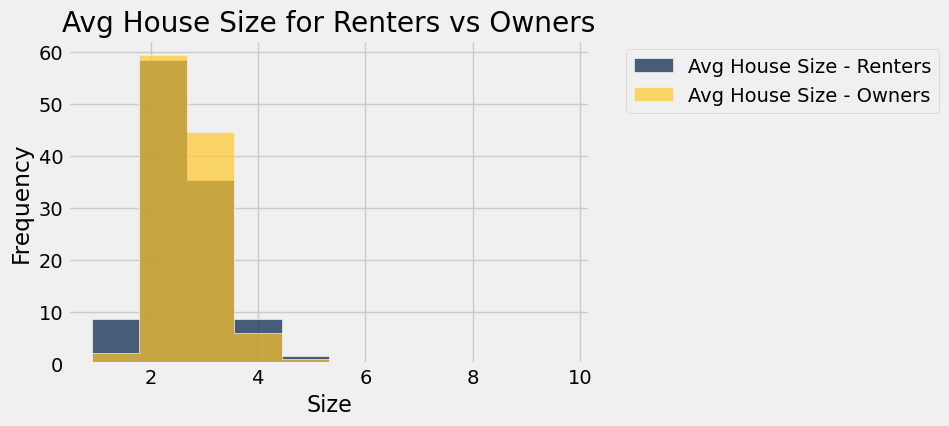

In [130]:
#Create distribution of avg_hh_size_renters and avg_hh_size_owners
house_data.hist("Avg House Size - Renters", "Avg House Size - Owners")
plt.ylabel("Frequency")
plt.xlabel("Size")
plt.title("Avg House Size for Renters vs Owners")

Text(0.5, 1.0, 'Median Rooms for Renters vs Owners')

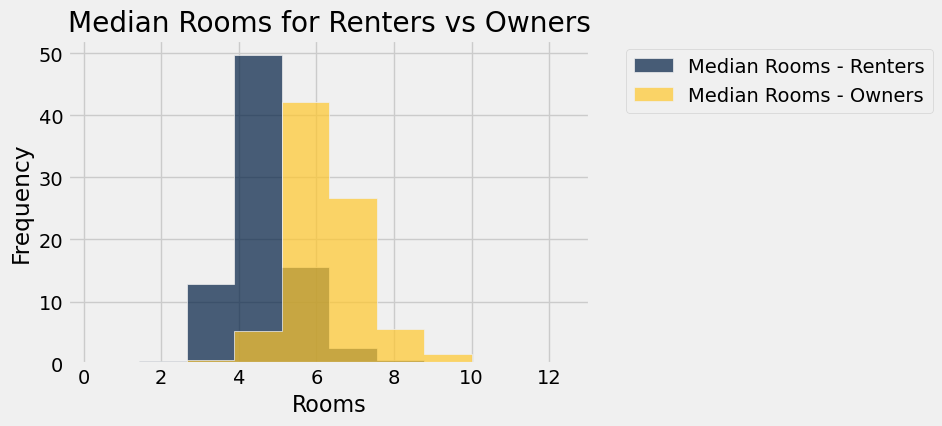

In [131]:
#Create distribution of median rooms per household for renters and owners
house_data.hist("Median Rooms - Renters", "Median Rooms - Owners")
plt.ylabel("Frequency")
plt.xlabel("Rooms")
plt.title("Median Rooms for Renters vs Owners")

The distribution of household size almost completely overlaps for renters and owners, indicating that there is perhaps a difference of 200 square feet, or 0.2, between the size of houses selected by renters and owners. On the other hand, the median number of rooms does seem to vary somewhat between renters and owners. The above histogram indicates that renters seem to select homes with fewer rooms (between 4 and 5), while owners select homes with more rooms (between 5 and 6). According to iProperty Management, the average difference in the number of rooms between renters and homeowners is 1.8, which appears to be in line with the above visualization. To accept or reject these hypotheses, a formal hypothesis test will be conducted for each set of variables. 

Starting with the average size of houses, the null and alternative hypotheses are defined below.

- Null Hypothesis: There is no statistical difference in house size between renters and owners.

- Alternative Hypothesis: There is a difference in size of about 200 square feet (0.2) or larger between houses selected by renters and houses selected by owners.

To determine whether or not the null hypothesis should be rejceted or accepted, a test statistic of the absolute value of the differences in average household size between renters and owners will be calculated. Larger values will favor the alternative hypothesis, while smaller values will favor the null hypothesis.

In [88]:
#Calculate test statistic
def diff_hsize():
    sample = house_data.sample(100, with_replacement=False).select("Avg House Size - Renters", "Avg House Size - Owners")
    avg_size_rent = np.mean(sample[0])
    avg_size_own = np.mean(sample[1])
    return abs(avg_size_rent - avg_size_own)
diff_hsize()

0.0038999999999989043

In [89]:
#Simulate test statistic
hsize_diffs = make_array()
repetitions = 1000
for i in range(repetitions):
    stat = diff_hsize()
    hsize_diffs = np.append(hsize_diffs, stat)
hsize_diffs

array([  5.28000000e-02,   4.18000000e-02,   8.00000000e-04,
         1.56000000e-01,   1.76200000e-01,   2.58000000e-02,
         7.58000000e-02,   6.81000000e-02,   1.41700000e-01,
         7.44000000e-02,   1.10200000e-01,   1.38900000e-01,
         6.87000000e-02,   3.86000000e-02,   3.74000000e-02,
         6.26000000e-02,   8.26000000e-02,   1.61000000e-01,
         6.29000000e-02,   1.64100000e-01,   1.75800000e-01,
         2.44000000e-02,   4.40000000e-03,   8.75000000e-02,
         4.21000000e-02,   6.98000000e-02,   7.51000000e-02,
         1.72100000e-01,   8.45000000e-02,   6.72000000e-02,
         1.61600000e-01,   1.20600000e-01,   7.51000000e-02,
         7.60000000e-03,   1.06200000e-01,   1.30400000e-01,
         3.26000000e-02,   1.74000000e-02,   4.37000000e-02,
         7.38693431e-02,   9.54000000e-02,   1.70200000e-01,
         7.00000000e-04,   5.90000000e-02,   8.39000000e-02,
         2.69600000e-01,   1.11400000e-01,   9.06000000e-02,
         8.60000000e-03,

Text(0.5, 1.0, 'Distribution of Differences - Size')

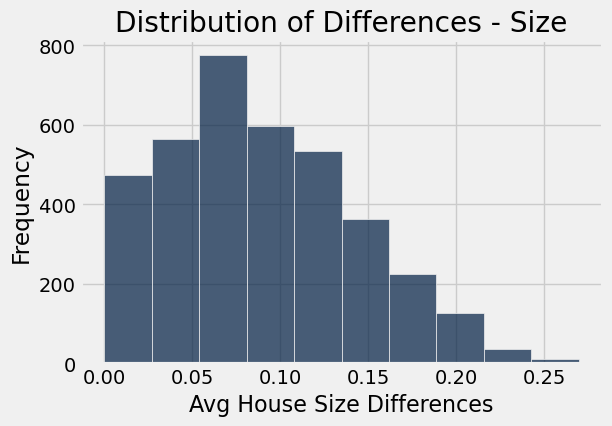

In [134]:
#Visualize test statistics
Table().with_column("Avg House Size Differences", hsize_diffs).hist()
plt.ylabel("Frequency")
plt.title("Distribution of Differences - Size")

In [91]:
#Calculate p-value
expected_diff = 0.2
p_val_hdiff = np.count_nonzero(hsize_diffs >= expected_diff) / repetitions
p_val_hdiff

0.03

As seen above, the p-value is 3%. With a cutoff value of 5%, the calculated p-value rejects the null hypothesis. This means there is a difference of about 200 square feet or greater between the houses selected by renters and the houses selected by owners.

This same process will be repeated for the median number of rooms within the homes of renters and owners. The null and alternative hypotheses are described below.

- Null Hypothesis: There is no difference in the median number of rooms between houses being rented versus houses that are owned.

- Alternative Hypothesis: There is a statistical difference of 1.8 or higher between the median number of rooms in houses that are rented and houses that are owned.

The test statistic that will be used will be the difference between the average of the median number of rooms for renters and owners. Values of differences 1.8 or higher will be in support of the alternative hypothesis.

In [93]:
#Calculate test statistic

def avg_rooms():
    sample = house_data.sample(100, with_replacement=False).select("Median Rooms - Renters", "Median Rooms - Owners")
    avg_rooms_renters = np.mean(sample[0])
    avg_rooms_owners = np.mean(sample[1])
    return abs(avg_rooms_renters - avg_rooms_owners)

avg_rooms()

1.7730000000000006

In [94]:
#Simulate multiple test statistics
avg_rooms_stats = make_array()
repetitions = 1000
for i in range(repetitions):
    stat = avg_rooms()
    avg_rooms_stats = np.append(avg_rooms_stats, stat)
avg_rooms_stats

array([ 1.697     ,  1.739     ,  1.658     ,  1.52      ,  1.469     ,
        1.583     ,  1.627     ,  1.623     ,  1.627     ,  1.599     ,
        1.657     ,  1.6       ,  1.789     ,  1.69      ,  1.681     ,
        1.545     ,  1.69      ,  1.728     ,  1.517     ,  1.897     ,
        1.607     ,  1.533     ,  1.482     ,  1.761     ,  1.661     ,
        1.634     ,  1.635     ,  1.694     ,  1.752     ,  1.702     ,
        1.609     ,  1.703     ,  1.566     ,  1.595     ,  1.695     ,
        1.608     ,  1.634     ,  1.455     ,  1.792     ,  1.53      ,
        1.743     ,  1.673     ,  1.552     ,  1.758     ,  1.583     ,
        1.646     ,  1.597     ,  1.719     ,  1.484     ,  1.465     ,
        1.564     ,  1.683     ,  1.617     ,  1.611     ,  1.451     ,
        1.515     ,  1.791     ,  1.561     ,  1.636     ,  1.662     ,
        1.602     ,  1.7       ,  1.678     ,  1.551     ,  1.657     ,
        1.597     ,  1.678     ,  1.682     ,  1.71      ,  1.48

Text(0.5, 1.0, 'Distribution of Differences - Rooms')

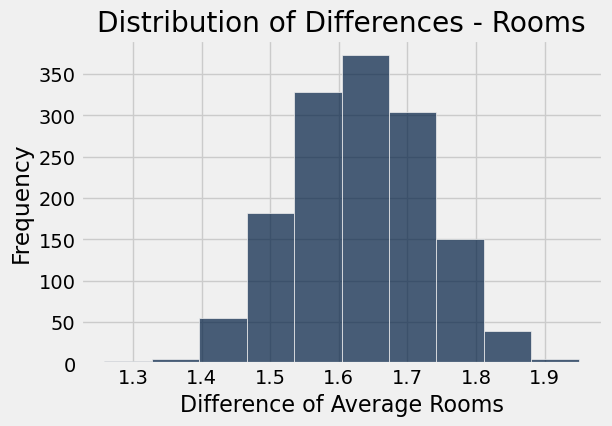

In [133]:
#Visualize the simulated test statistics
Table().with_column("Difference of Average Rooms", avg_rooms_stats).hist()
plt.ylabel("Frequency")
plt.title("Distribution of Differences - Rooms")

In [96]:
#Calculate p-value
expected_avg_diff_rooms = 1.8
p_val_rooms = np.count_nonzero(avg_rooms_stats >= expected_avg_diff_rooms) / repetitions
p_val_rooms

0.038

The difference in the average number of rooms between renters and owners is expected to be zero under the null hypothesis. However, as seen from the histogram above, the value zero does not even occurr. Furthermore, the p-value is 3.8%, which is far below the cutoff value of 5%. This means the null hypothesis can be rejected, and the differences between renters and owners regarding the median number of rooms in a house is statistically significant. In other words, there does exist a difference between the median number of rooms in a renter's house compared with an owner's house in the same area by 1.8 or higher. According to the histogram, it appears that renters have, on average, 1.65 less rooms than owners in the same area. 

### Question 4 Conclusion

From the distributions and hypothesis tests conducted, it can be concluded that the average house size between renters and owners differs by about 200 square feet, or more. Moreover, there is a statistically significant difference between the median number of rooms in houses that are rentered versus houses that are owned. On average, people who own houses tend to purchase houses that have 1.8 (or 2) more rooms than houses that are rented. 

## Question 5: How does region impact family size in the United States?

The United States is one of the largest countries in the world. As a result, there are family sizes ranging from just 1 person to up from 7 people. Furthermore, it is expected that various samples of the location affordability index would have a large distribution of the average household size. Thus, it is expected that the average family size of a sample would vary by 0.1 or larger.

- Null Hypothesis: There is no difference between the average family size of a sample and the expected family size.
- Alternative Hypothesis: There is a statistical difference between the average family size of a sample and the expected family size from the population.

The test statistic for this hypothesis test will be the difference of the average family size in the United States and the average of a sample of average family sizes. Large values of the test statistic will be in support of the alternative hypothesis.

In [97]:
#Extract data
fam_size = lai_data.select("avg_hh_size")
fam_size = fam_size.relabeled("avg_hh_size", "Family Size")
fam_size

Family Size
2.69
2.8
2.57
2.87
2.56
2.79
2.41
2.82
2.72
2.56


In [98]:
#Calculate mean of lai family size data
avg_fam_size_lai = np.mean(fam_size["Family Size"])
avg_fam_size_lai

2.6503018715458651

Text(0.5, 1.0, 'Distribution of Family Sizes')

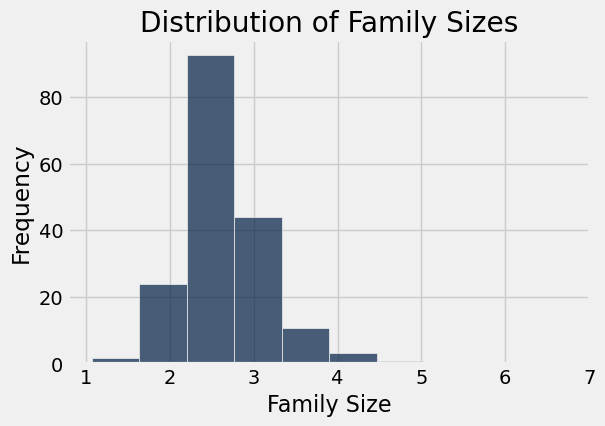

In [135]:
#Visualize distribution
fam_size.hist()
plt.ylabel("Frequency")
plt.title("Distribution of Family Sizes")

In [100]:
#Calculate a test statistic
def fam_size_diff():
    sample = fam_size.sample(100, with_replacement=False)
    return abs(np.mean(sample["Family Size"]) - avg_fam_size_lai)

fam_size_diff()

0.077301871545865097

In [101]:
#Simulate multiple test statistics
diffs = make_array()
repetitions = 1000
for i in range(repetitions):
    stat = fam_size_diff()
    diffs = np.append(diffs, stat)
    
diffs

array([  4.71018715e-02,   4.23981285e-02,   9.31981285e-02,
         4.28981285e-02,   2.47018715e-02,   2.42981285e-02,
         8.69812845e-03,   5.03981285e-02,   4.72018715e-02,
         6.74018715e-02,   5.04981285e-02,   2.58018715e-02,
         3.01981285e-02,   9.81284541e-05,   2.41981285e-02,
         8.29812845e-03,   5.26018715e-02,   5.74981285e-02,
         4.39018715e-02,   3.34981285e-02,   6.43018715e-02,
         6.78981285e-02,   3.09981285e-02,   5.69812845e-03,
         3.18981285e-02,   8.50187155e-03,   7.56981285e-02,
         3.50018715e-02,   1.69018715e-02,   5.40187155e-03,
         5.39812845e-03,   3.34981285e-02,   3.50018715e-02,
         6.86018715e-02,   9.81284541e-05,   2.33981285e-02,
         1.90187155e-03,   6.34981285e-02,   6.60187155e-03,
         6.86981285e-02,   8.99812845e-03,   7.32018715e-02,
         2.01018715e-02,   3.13018715e-02,   3.71018715e-02,
         6.32018715e-02,   3.48981285e-02,   7.31018715e-02,
         3.78981285e-02,

Text(0.5, 1.0, 'Distribution of Family Size Differences')

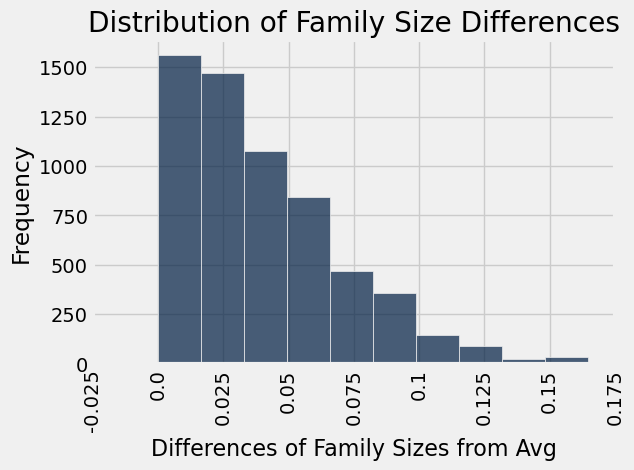

In [136]:
#Visualize simulated test statistics
Table().with_column("Differences of Family Sizes from Avg", diffs).hist()
plt.ylabel("Frequency")
plt.title("Distribution of Family Size Differences")

In [103]:
#Calculate p-value

observed_avg = 0.1
p_val_avg = np.count_nonzero(diffs >= observed_avg) / repetitions
p_val_avg

p_val_avg

0.048

### Question 5 Conclusion

From the distribution and p-value, it can be concluded that there is a statistical significance between the sample average family sizes and the expected average family size. The p-value is 4.8%, which falls below the cut-off value of 5%, indicating statistical significance. This means average family sizes tend to vary quite a bit across the United States.

## Question 6: Do the different regions of Minnesota have statistically difference rates compared to the average for Minnesota?

For this question, two datasets will be used: the location affordability index and the minnesota homeownership rate dataset. The average homeownership rate for Minnesota between 2012 and 2016 will be calculated from the minnesota homeownership rate dataset. 

- Null Hypothesis: There is no difference between the homeownership rates of the geographical regions in Minnesota.
- Alternative Hypothesis: There is a statistical difference between the homeownership rates of the geographical regions in Minnesota.

The test statistic that will be used is the difference of average homeownership rate across 100 geographic regions in Minnesota and the average homeownership rate of Minnesota. It is expected that these values would differ by about 0.5%, and anything higher than this value would indicate an uneven distribution of homeownership rates across Minnesota.

In [104]:
#Calculate average Minnesota homeownership rate

mnhown_for_lai = mnhown.where("observation_date", are.contained_in(["2012-01-01", "2013-01-01", "2014-01-01", "2015-01-01", "2016-01-01"]))
avg_mnhown = np.mean(mnhown_for_lai["mn_rate"]) / 100
avg_mnhown

0.73059999999999992

In [105]:
#Exctract data from lai dataset
mn_lai = lai_data.where("state_name", are.equal_to("Minnesota")).select("homeownership_rate")
mn_lai

homeownership_rate
0.927842
0.943089
0.926403
0.648734
0.787468
0.810046
0.894143
0.809922
0.41601
0.965486


Text(0.5, 1.0, 'Distribution of MN Homeownership Rates')

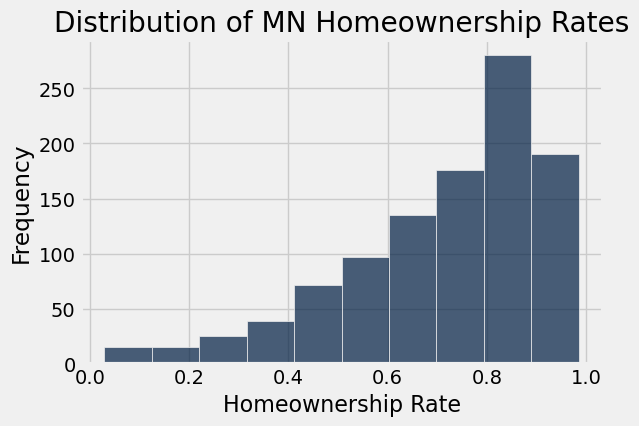

In [137]:
#Visualize all homeownership rates across Minnesota contained in the lai dataset
mn_lai.hist()
plt.ylabel("Frequency")
plt.xlabel("Homeownership Rate")
plt.title("Distribution of MN Homeownership Rates")

In [107]:
#Calculate one test statistic

def avg_rate_diff():
    sample = mn_lai.sample(100, with_replacement=False)
    return abs(np.mean(sample["homeownership_rate"]) - avg_mnhown)

avg_rate_diff()

0.02688693315054691

In [108]:
#Simulate test statistics for multiple samples
avg_rates_diffs = make_array()
repetitions = 1000
for i in range(repetitions):
    stat = avg_rate_diff()
    avg_rates_diffs = np.append(avg_rates_diffs, stat)
avg_rates_diffs

array([ 0.02069111,  0.04466539,  0.03692866,  0.00889114,  0.01271437,
        0.01865599,  0.02252051,  0.01508658,  0.0288879 ,  0.02489474,
        0.04785346,  0.00983061,  0.02087623,  0.00663871,  0.00403601,
        0.01892144,  0.01473189,  0.0365265 ,  0.0234075 ,  0.00133398,
        0.01020269,  0.00464176,  0.00328278,  0.01982557,  0.04948861,
        0.00680789,  0.01487216,  0.01312079,  0.01276341,  0.02735074,
        0.02316547,  0.02602301,  0.02615121,  0.01445752,  0.02703935,
        0.01496984,  0.00463639,  0.00213557,  0.04916186,  0.01799597,
        0.01919666,  0.00229574,  0.00939447,  0.00752424,  0.01098177,
        0.04126409,  0.00588565,  0.0289652 ,  0.02441938,  0.03447325,
        0.001326  ,  0.01378034,  0.02282355,  0.01293612,  0.02098141,
        0.03103878,  0.0133088 ,  0.03781334,  0.05636207,  0.01411784,
        0.02705965,  0.01145086,  0.01362652,  0.00943319,  0.01349513,
        0.01652549,  0.02757792,  0.01594396,  0.02038207,  0.00

Text(0.5, 1.0, 'Distribution of Rate Differences')

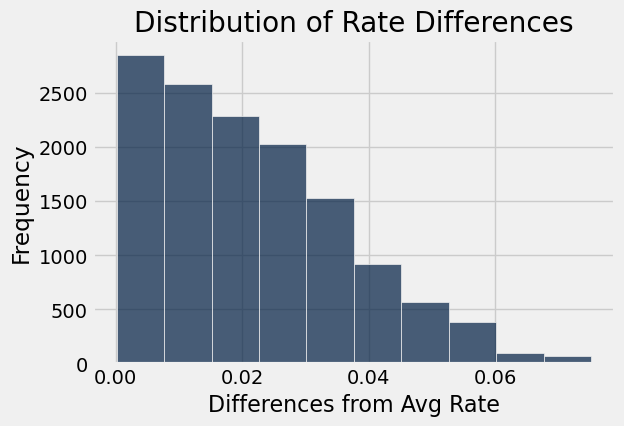

In [138]:
#Visualize distribution of average rates
Table().with_column("Average Rate Differences", avg_rates_diffs).hist()
plt.xlabel("Differences from Avg Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Rate Differences")

In [112]:
#Calculate p-value
p_val_rates = np.count_nonzero(avg_rates_diffs >= 0.05) / repetitions
p_val_rates

0.053

### Question 6 Conclusion

With a p-value of 5.3% and a p-value cutoff of only 5%, it can be concluded that the null hypothesis is supported by the data. This means there is no statistical significance in the average homeownership rates for the various geographic regions of Minnesota and the average homeownership rate of Minnesota. Moreover, the homeownership rate in Minnesota tends to be steady across the state, and is not centralized in a specific geographic region. In other words, homeownership is accessible at the same rate across the state. 

## Analysis Conclusion

Overall, the Location Affordability Index and Minnesota Homeownership Rate datasets provide ample data for a variety of hypothesis tests to be performed. Together, the conclusions of such tests provide greater insights into the variables affecting homeownership rates in various regions across the United States. Moreover, the results of this analysis provide a starting point for individuals looking for ways to identify areas with affordable homes. For example, the correlation between the average number of cars and the homeownership rate indicates that those with houses also tend to have more cars than those who just rent. This does not mean that having a higher number of cars will automatically result in homes being more accessible. Rather, it is an indication that houses will most likely be built with additional space for more cars, potentially making them more expensive and, therefore, unobtainable to some. Many individuals search for houses with fewer bedrooms to lower costs. However, if an individual is looking to purchase a house that is in line with a lower budget, searching for houses with fewer or smaller garages would also be a good place to start. Another example concerns the correlation between median income, median mortgage, and homeownership rates in the D.C. area. As a result of the regression analysis conducted with these variables, an individual who knows of the homeownership rate in a D.C. area can utilize the regression models in order to estimate the incomes and mortgages of that area. By comparing those numbers with the individual's current income and/or mortgage, they will have a good indication of their own success in that area. Thus, the results of the hypothesis tests, and whether they support or reject the null hypothesis, serve as an assessment of the variables impacting homeownership rates across the United States, which enables greater decision-making on the part of the homebuyer.  